In [1]:
import json
import numpy as np
def load_json():
    
    authors = []
    features = []
    scores = []
    
    with open('dataset.json') as data_file:
        data = json.load(data_file)
        labels = data["column_descriptors"]
        author_data = data["author_data"]
        
        for author in author_data.keys():
            authors.append(author)
            features.append(author_data[author]['feature_vecs'])
            scores_str = author_data[author]['scores']
            scores.append(np.asarray([int(score_) for score_ in scores_str]))
    
    # features to numpy array
    features = [np.asarray(feature) for feature in features]
    
    return labels, authors, features, scores

In [2]:
labels, authors, features, scores = load_json()
print (authors[0], features[0].shape, scores[0].shape)
print (labels)

(u'bodmas', (3, 34), (3,))
[u'number_of_modules', u'lines_of_code', u'lines_of_code_per_module', u'McCabes_cyclomatic_complexity', u'McCabes_cyclomatic_complexity_per_module', u'lines_of_comment', u'lines_of_comment_per_module', u'lines_of_code_per_line_of_comment', u'McCabes_cyclomatic_complexity_per_line_of_comment', u'IF4', u'IF4_per_module', u'IF4_visible', u'IF4_visible_per_module', u'IF4_concrete', u'IF4_concrete', u'rejected_lines_of_code\n', u'Files', u'Lines', u'AVG Len', u'Code', u'Comments', u'White SP', u'Cd/Cm+WS', u'Cd/Cm', u'Cd/WS', u'% Code', u'cnt_classes', u'max_member_funs', u'max_nested_loops', u'max_nesting_depth', u'max_params_in_decl', u'member_funs', u'member_vars', u'min_member_funs\n']


In [3]:
# training and test split
import random
cnt_train = 0.7 * len(authors)

train_authors_indices = set()

while len(train_authors_indices) < cnt_train:
    train_authors_indices.add(random.randint(0, len(authors) - 1))
    
test_authors_indices = set()

for i in range(len(authors)):
    if i not in train_authors_indices:
        test_authors_indices.add(i)

train_authors = [authors[i] for i in train_authors_indices]
        
test_authors = [authors[i] for i in test_authors_indices]

print(len(train_authors))
print(len(test_authors))

1276
546


In [4]:
X_list =[]
y_list = []

for index in range(len(authors)):
    X_list.extend(features[index])
    y_list.extend(scores[index])
X = np.asarray(X_list)
y = np.asarray(y_list)

print (X.shape, y.shape)

((18667, 34), (18667,))


In [5]:
import pandas as pd
#print 'labels', labels_reduced
print X.shape
df_before_feature_sel = pd.DataFrame(X)

(18667, 34)


In [6]:
print (df_before_feature_sel.columns)
print (len(labels))

RangeIndex(start=0, stop=34, step=1)
34


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_before_feature_sel, size=3)
plt.show()

In [8]:
for i, label in enumerate(labels):
    print (i, label)

(0, u'number_of_modules')
(1, u'lines_of_code')
(2, u'lines_of_code_per_module')
(3, u'McCabes_cyclomatic_complexity')
(4, u'McCabes_cyclomatic_complexity_per_module')
(5, u'lines_of_comment')
(6, u'lines_of_comment_per_module')
(7, u'lines_of_code_per_line_of_comment')
(8, u'McCabes_cyclomatic_complexity_per_line_of_comment')
(9, u'IF4')
(10, u'IF4_per_module')
(11, u'IF4_visible')
(12, u'IF4_visible_per_module')
(13, u'IF4_concrete')
(14, u'IF4_concrete')
(15, u'rejected_lines_of_code\n')
(16, u'Files')
(17, u'Lines')
(18, u'AVG Len')
(19, u'Code')
(20, u'Comments')
(21, u'White SP')
(22, u'Cd/Cm+WS')
(23, u'Cd/Cm')
(24, u'Cd/WS')
(25, u'% Code')
(26, u'cnt_classes')
(27, u'max_member_funs')
(28, u'max_nested_loops')
(29, u'max_nesting_depth')
(30, u'max_params_in_decl')
(31, u'member_funs')
(32, u'member_vars')
(33, u'min_member_funs\n')


In [9]:
df_descriptions = df_before_feature_sel.describe()
print (df_descriptions.T)

      count           mean           std   min        25%        50%  \
0   18667.0       1.090641      0.521510  1.00       1.00       1.00   
1   18667.0      59.353190     43.497235  1.00      36.00      50.00   
2   18667.0      55.490070     32.857493  1.00      35.00      48.00   
3   18667.0      16.485402     15.168497  0.00       8.00      13.00   
4   18667.0      15.576387     13.461788  0.00       7.00      12.00   
5   18667.0       3.765576     15.713132  0.00       0.00       0.00   
6   18667.0       3.343825     10.688202  0.00       0.00       0.00   
7   18667.0      12.426968     21.605963  0.00       0.00       0.00   
8   18667.0       3.414422      7.221709  0.00       0.00       0.00   
9   18667.0       0.003643      0.144129  0.00       0.00       0.00   
10  18667.0       0.000563      0.020894  0.00       0.00       0.00   
11  18667.0       0.002036      0.079483  0.00       0.00       0.00   
12  18667.0       0.000338      0.013098  0.00       0.00       

In [12]:
# y is vector of labels
def create_labels(y):
    y_l = np.copy(y)
    for i in range(y.shape[0]):
        if y[i] >= 80: 
            y_l[i] = 5
        if y[i] >= 60 and y[i] < 80: 
            y_l[i] = 4
        if y[i] >= 40 and y[i] < 60:
            y_l[i] = 3
        if y[i] >= 20 and y[i] < 40:
            y_l[i] = 2
        if y[i] < 20: 
            y_l[i] = 1
    return y_l

y_labels = create_labels(y)

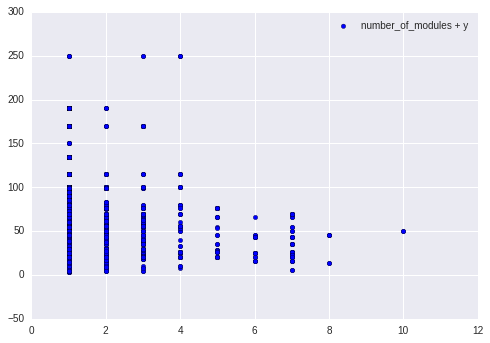

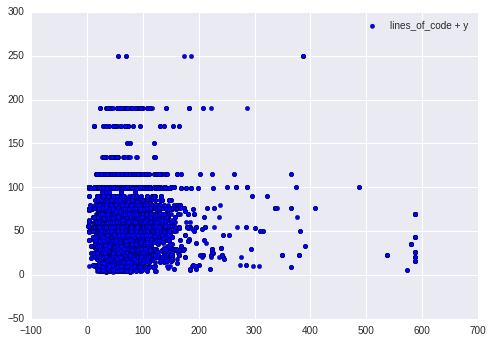

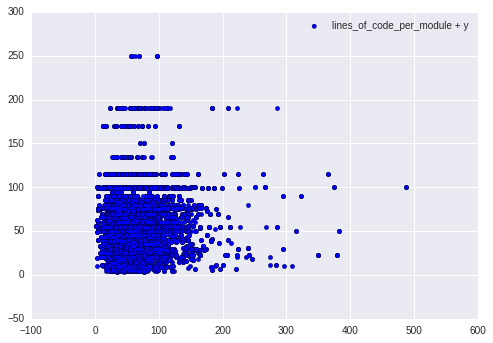

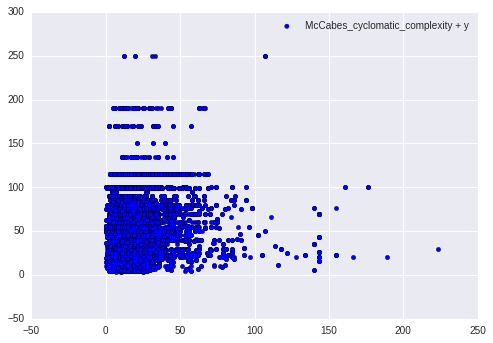

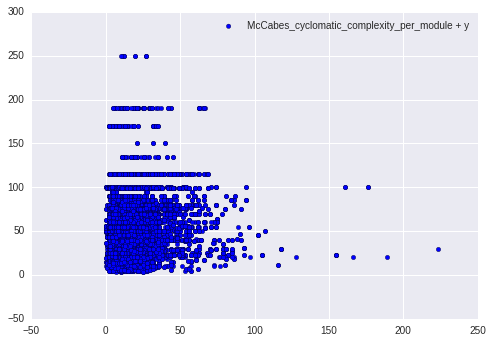

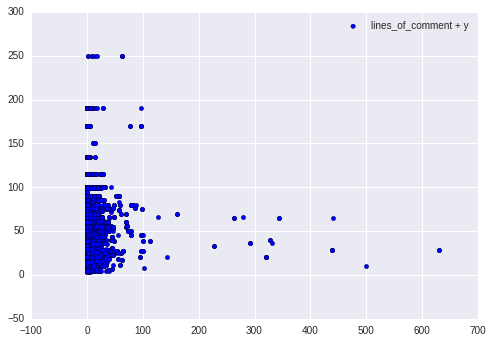

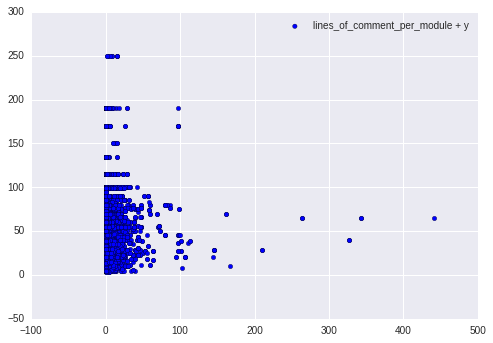

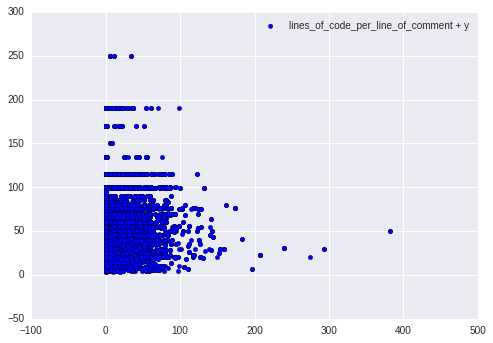

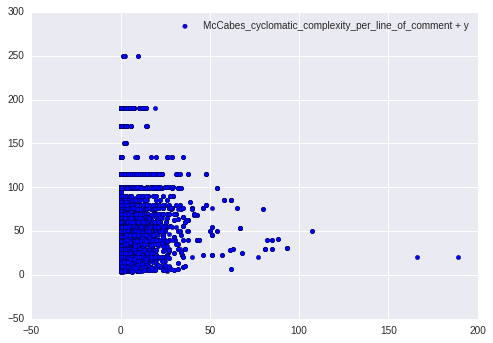

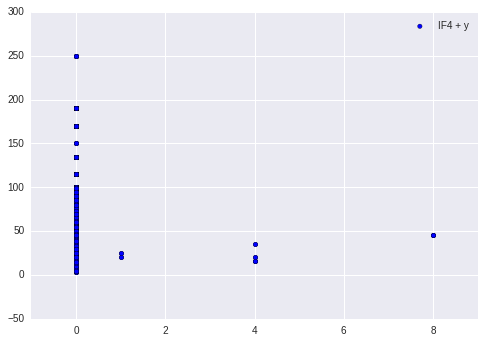

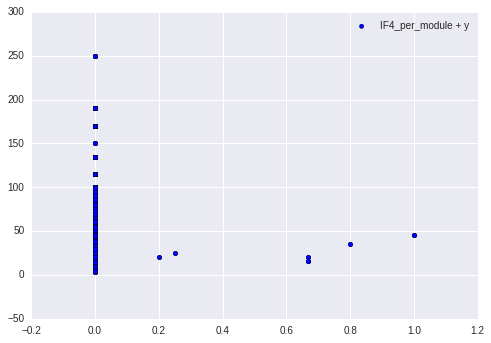

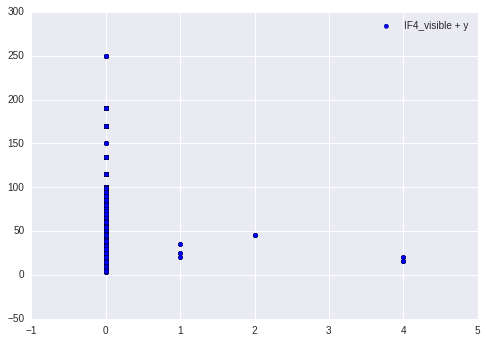

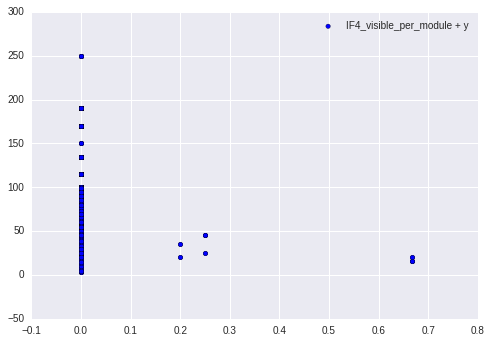

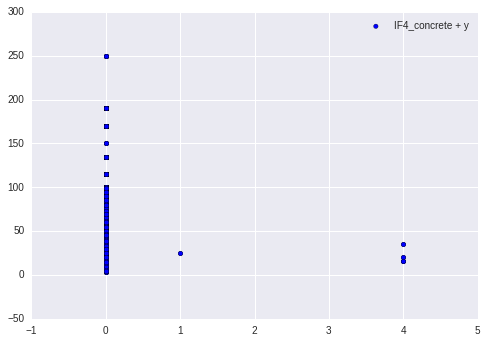

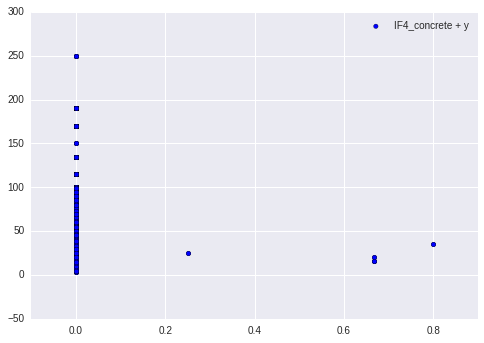

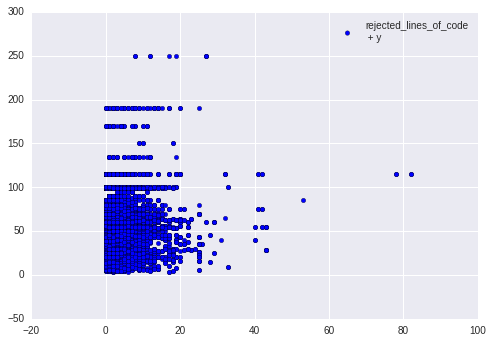

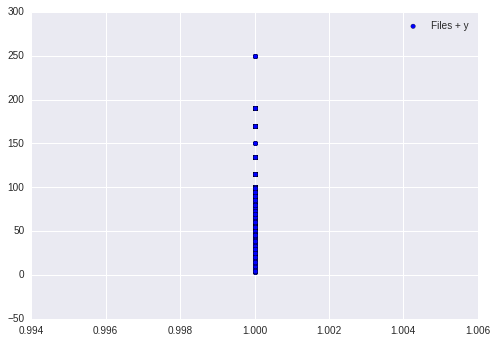

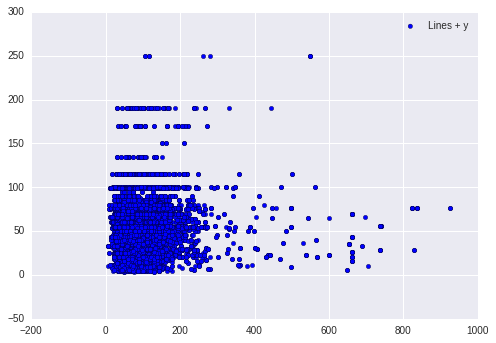

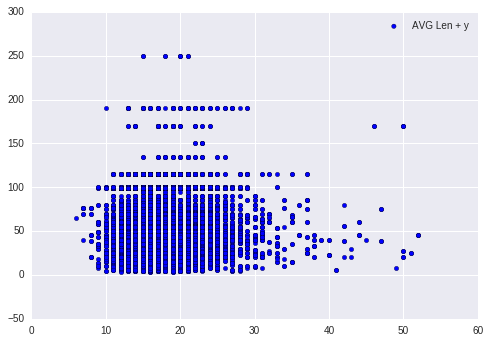

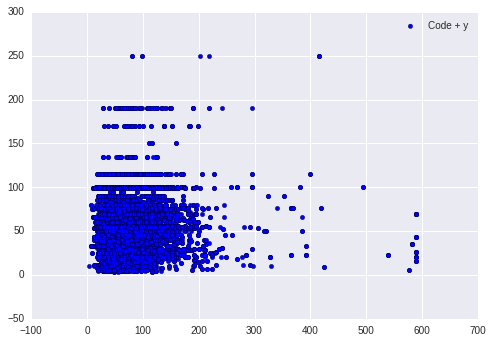

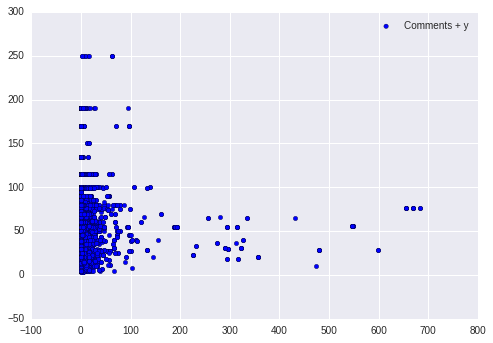

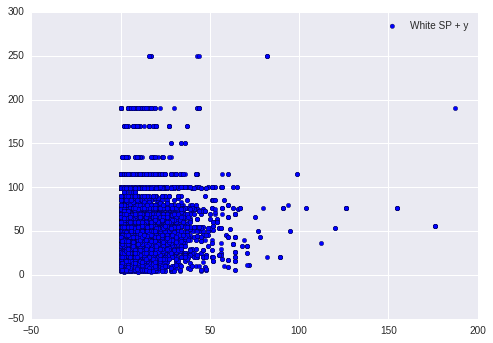

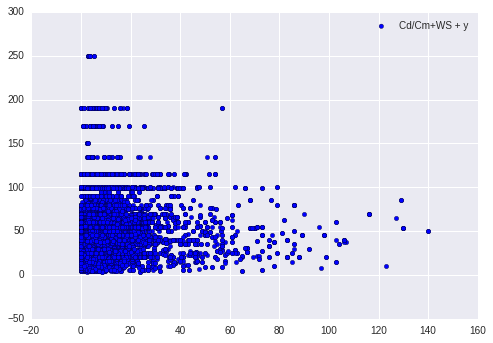

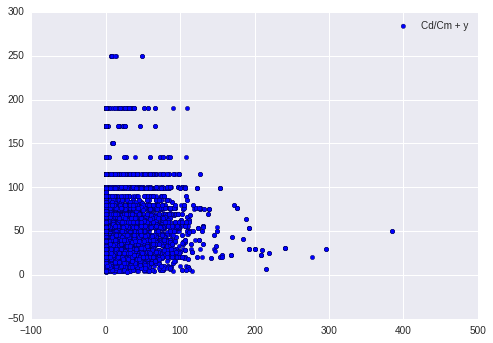

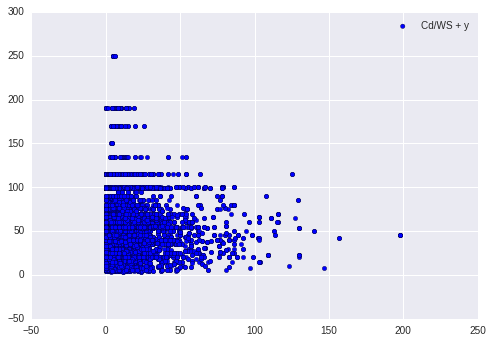

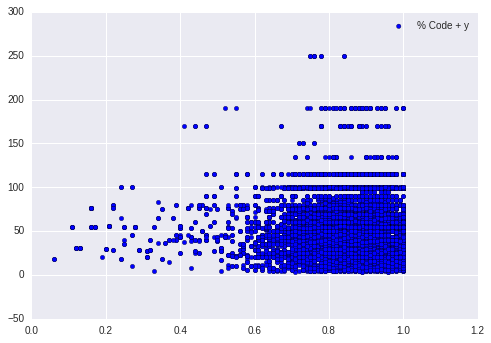

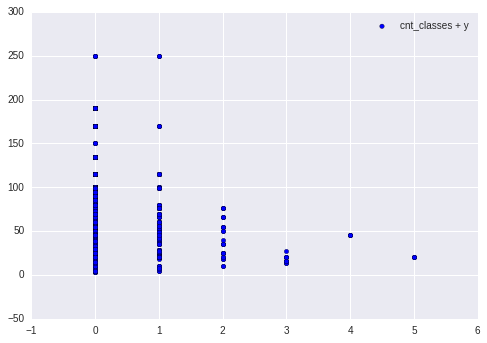

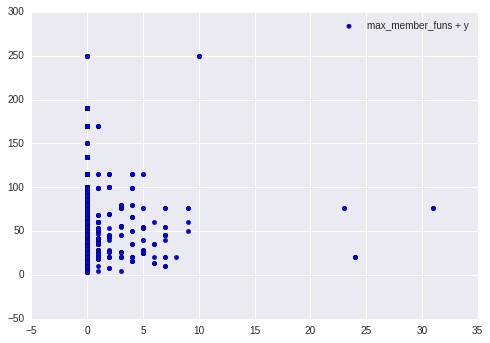

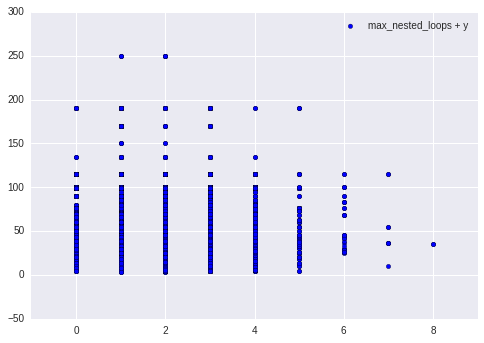

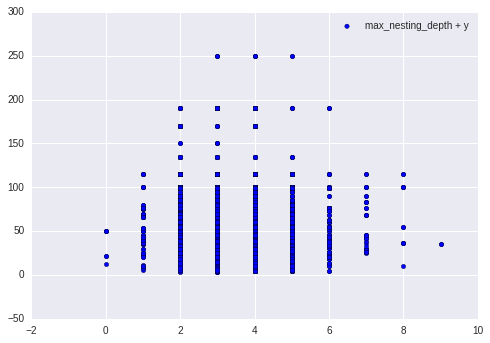

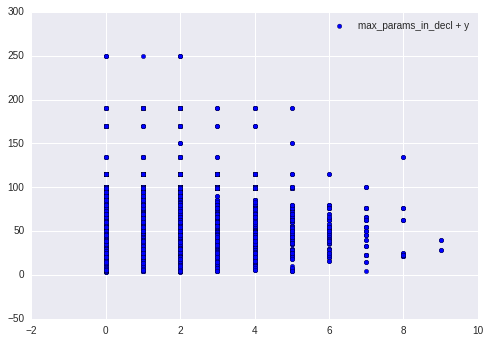

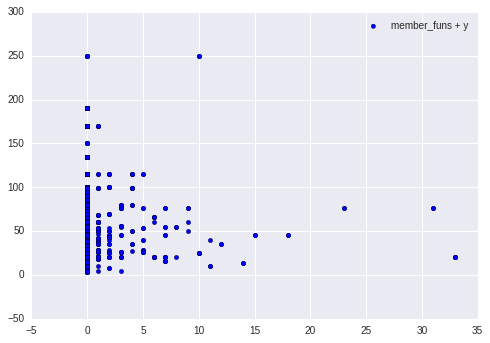

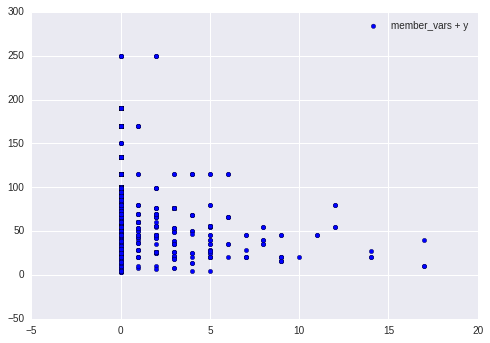

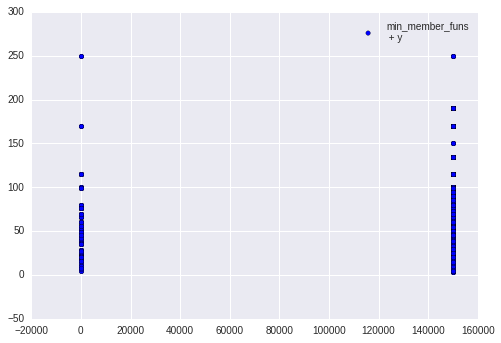

In [14]:
import matplotlib.pyplot as plt

for i in range(0, X[0].size):
    temp1 = list()
    for k in range(0, len(X)):
        temp1.append(X[k][i])  
        
    plt.scatter(temp1, y, label=labels[i] + " + y")
    plt.legend()
    plt.show()

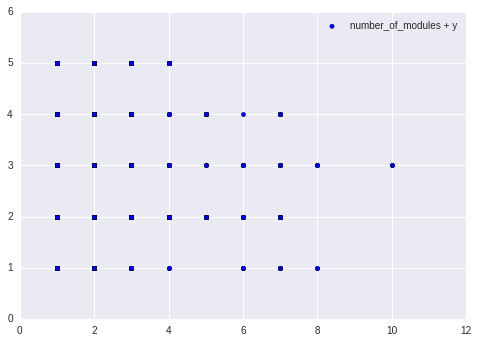

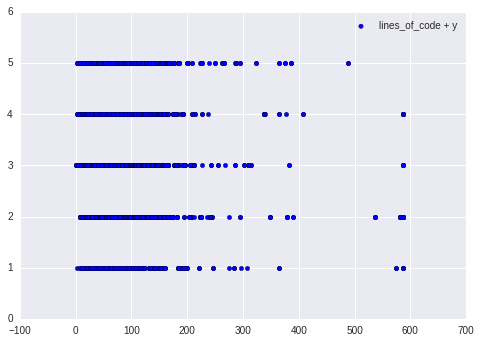

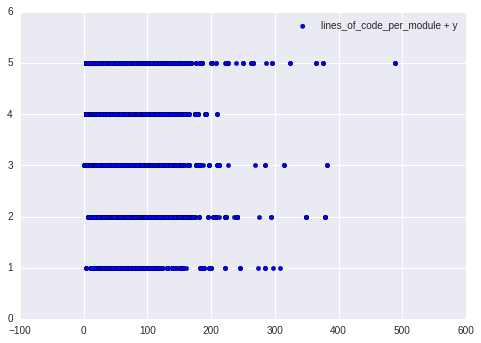

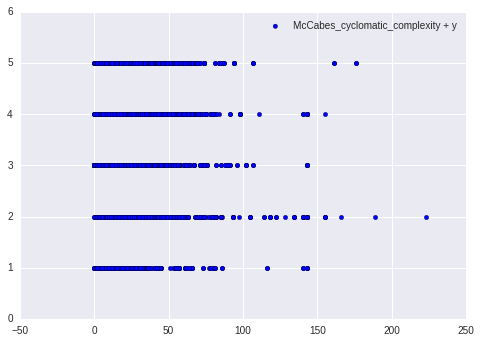

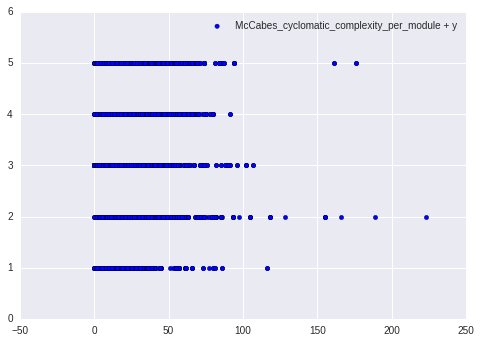

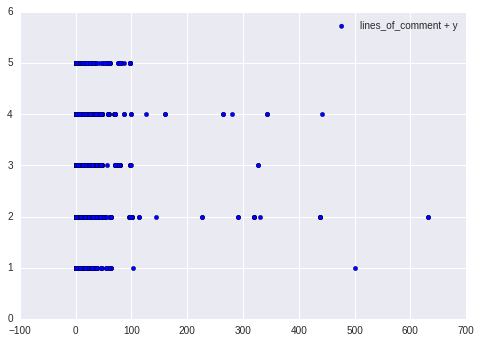

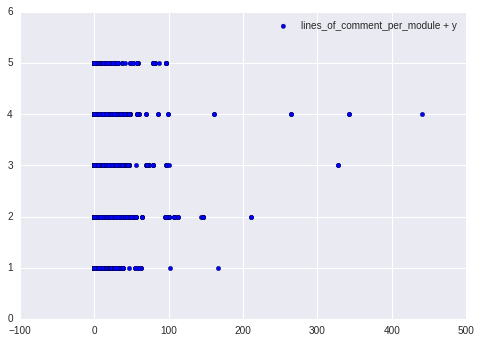

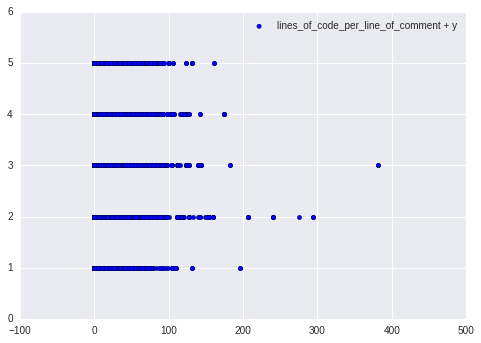

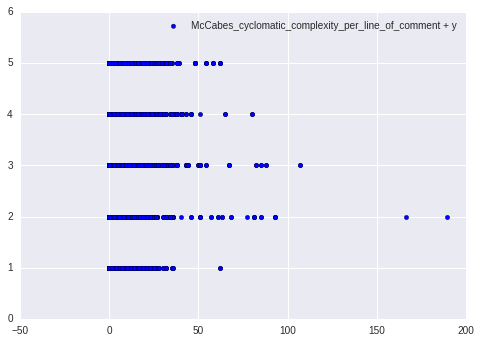

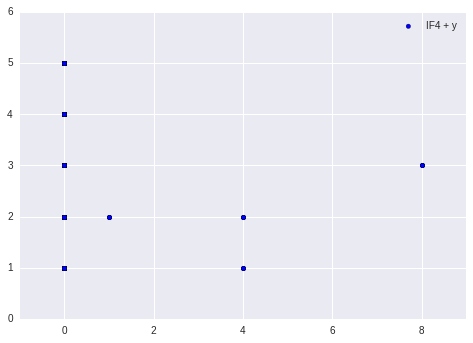

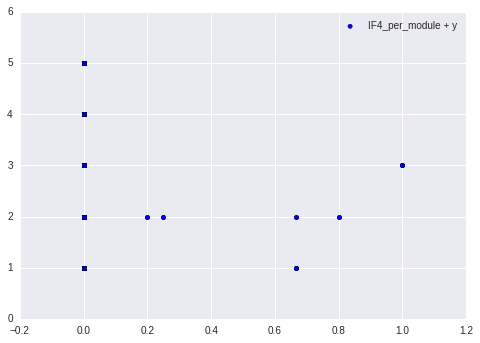

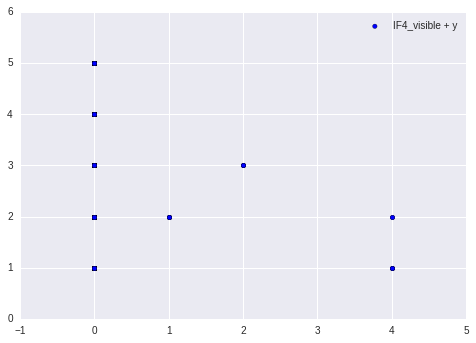

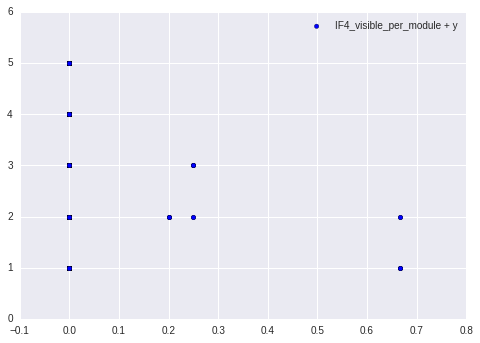

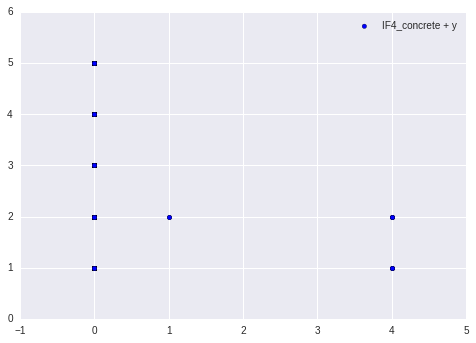

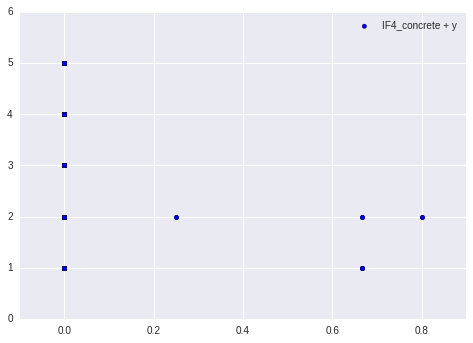

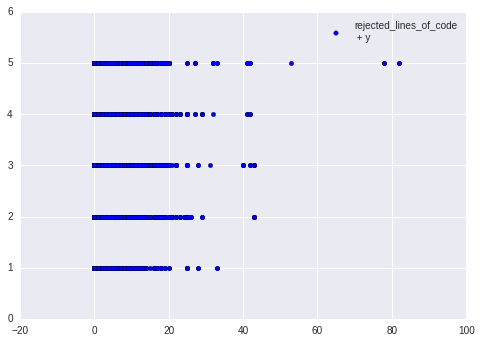

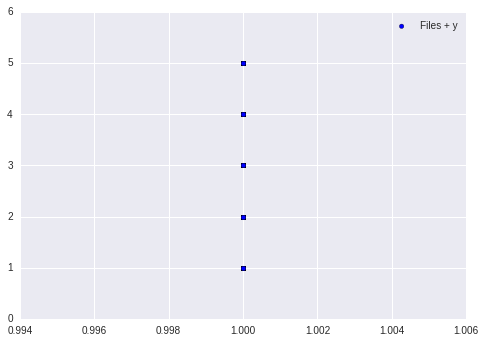

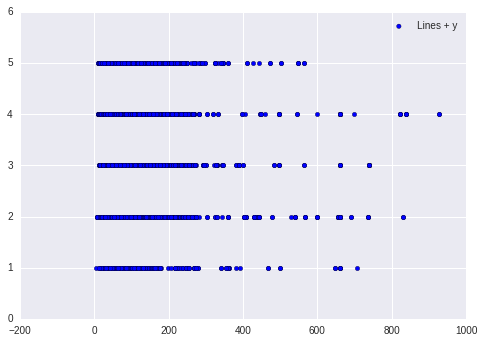

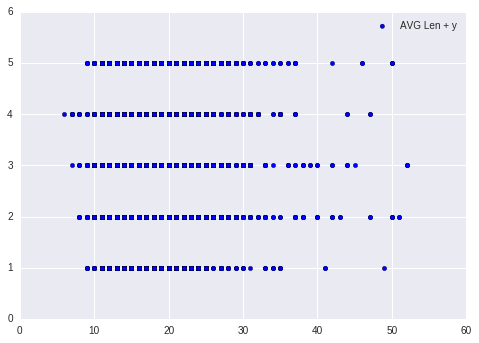

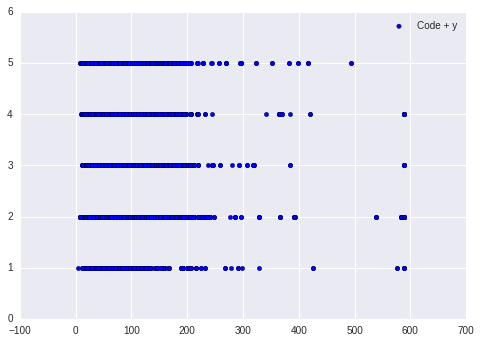

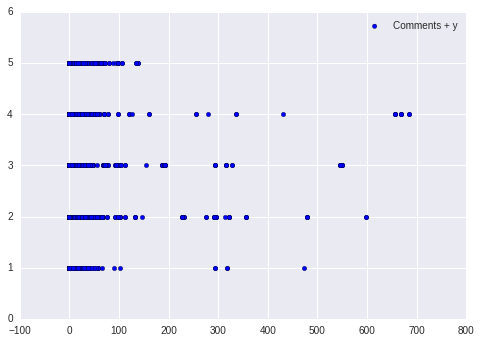

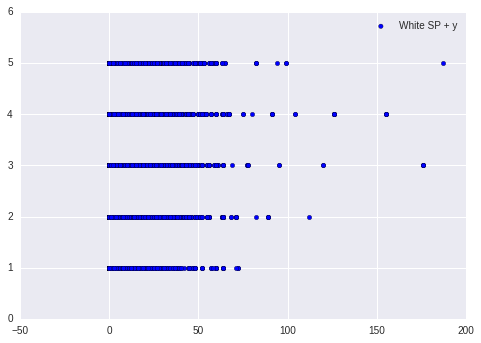

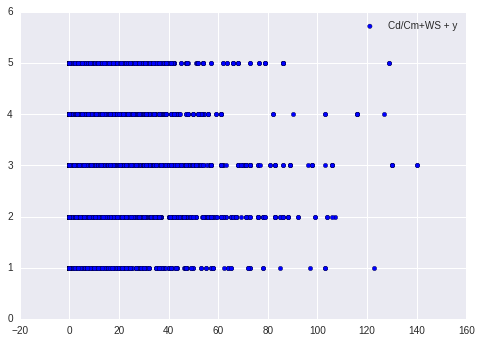

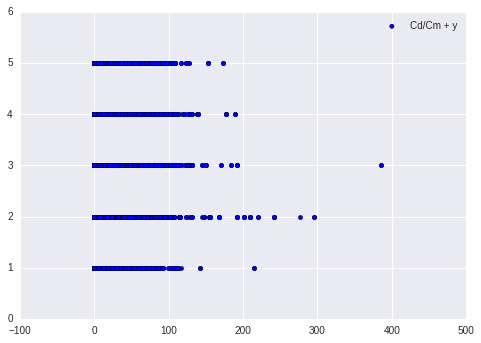

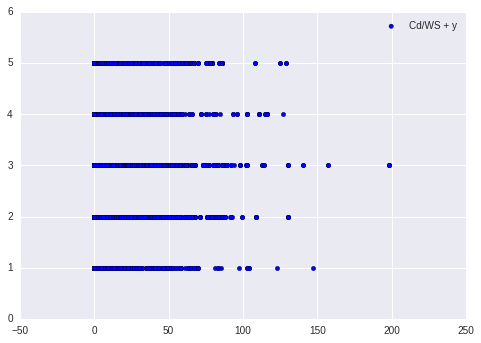

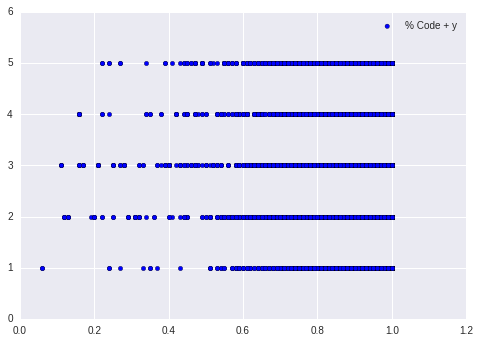

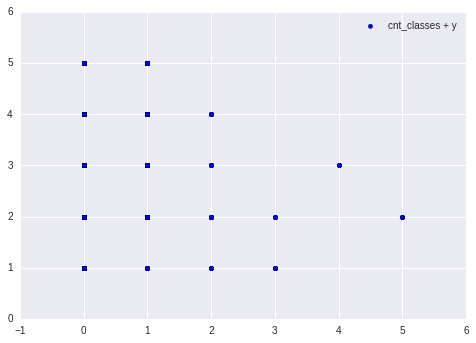

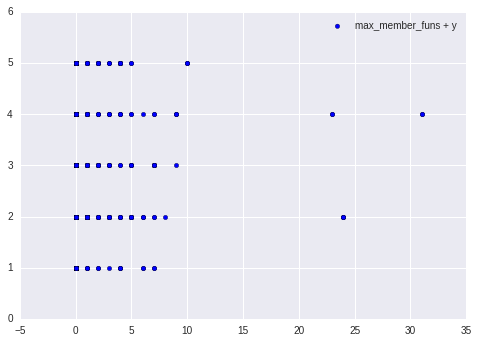

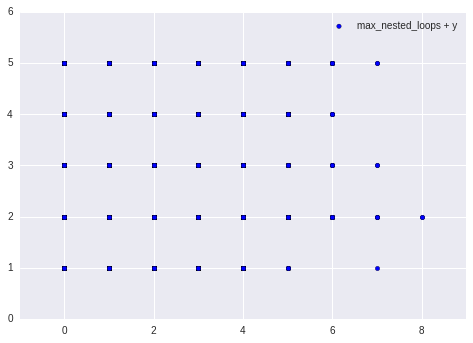

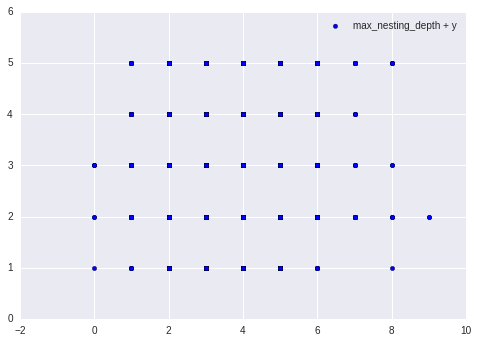

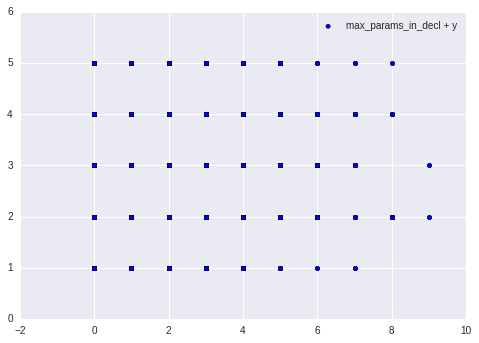

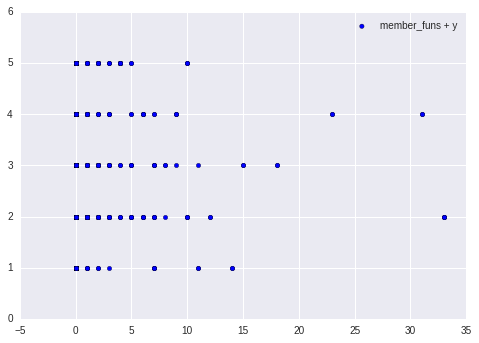

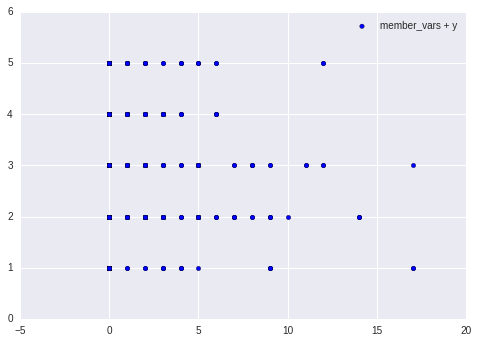

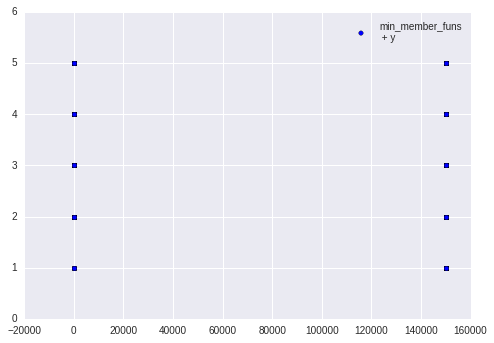

In [13]:
for i in range(0, X[0].size):
    temp1 = list()
    for k in range(0, len(X)):
        temp1.append(X[k][i])  
        
    plt.scatter(temp1, y_labels, label=labels[i] + " + y")
    plt.legend()
    plt.show()

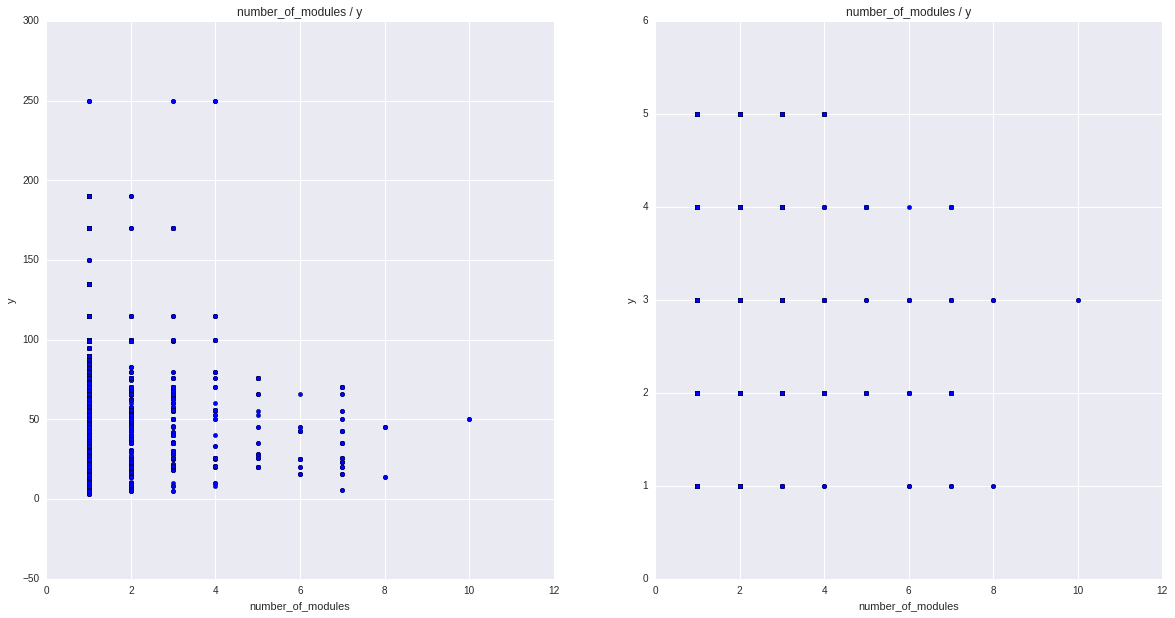

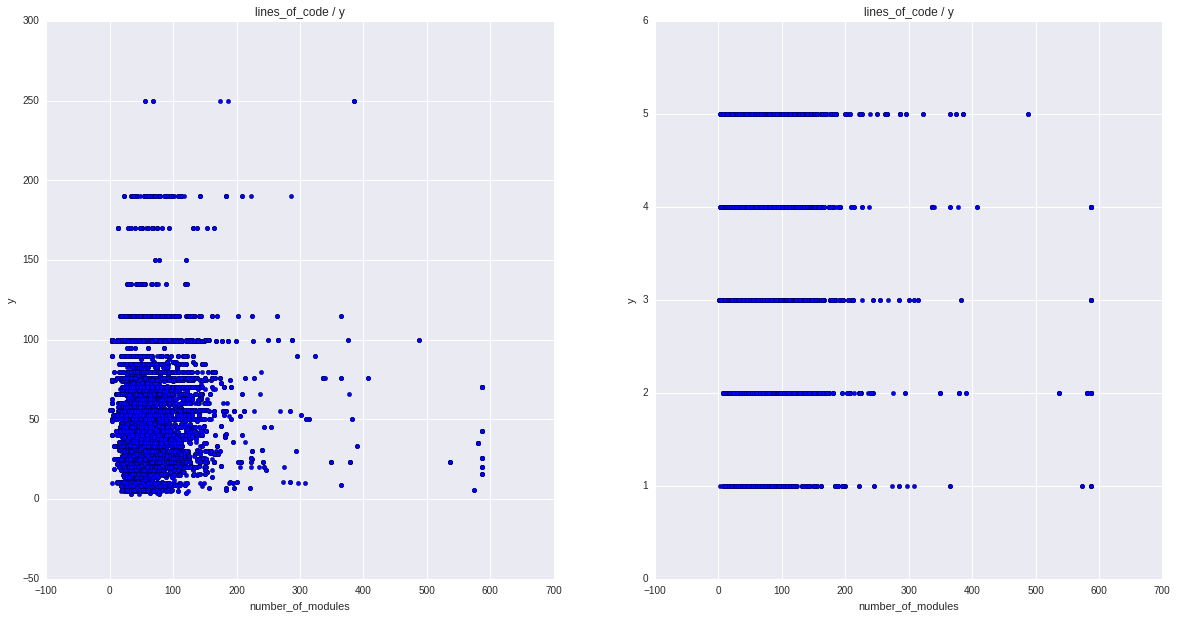

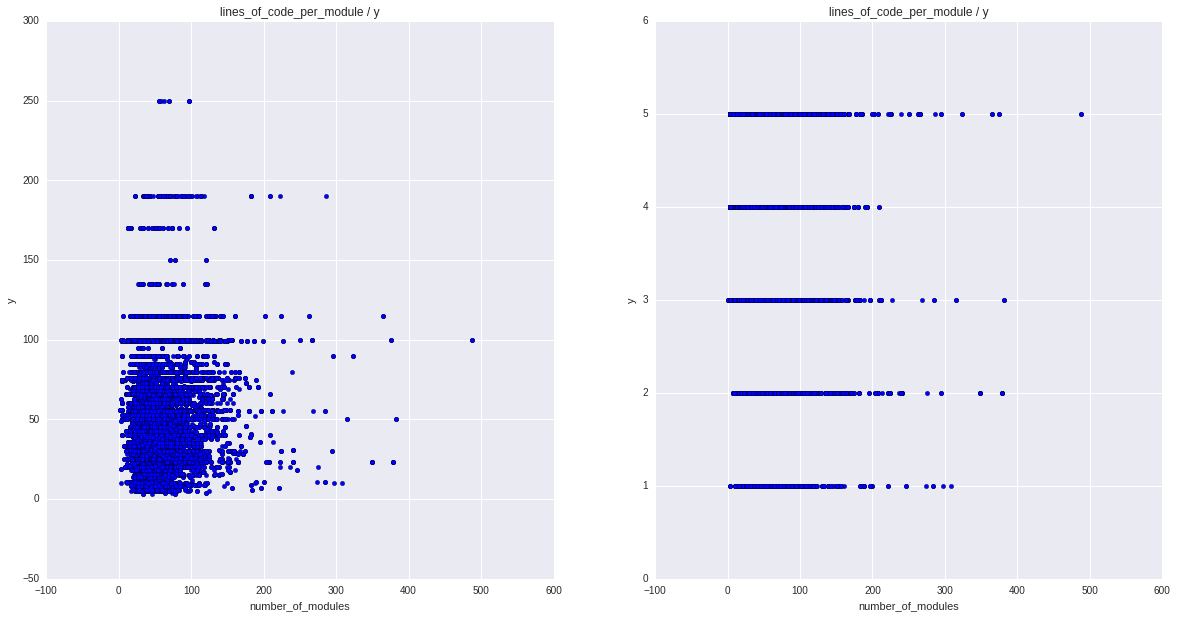

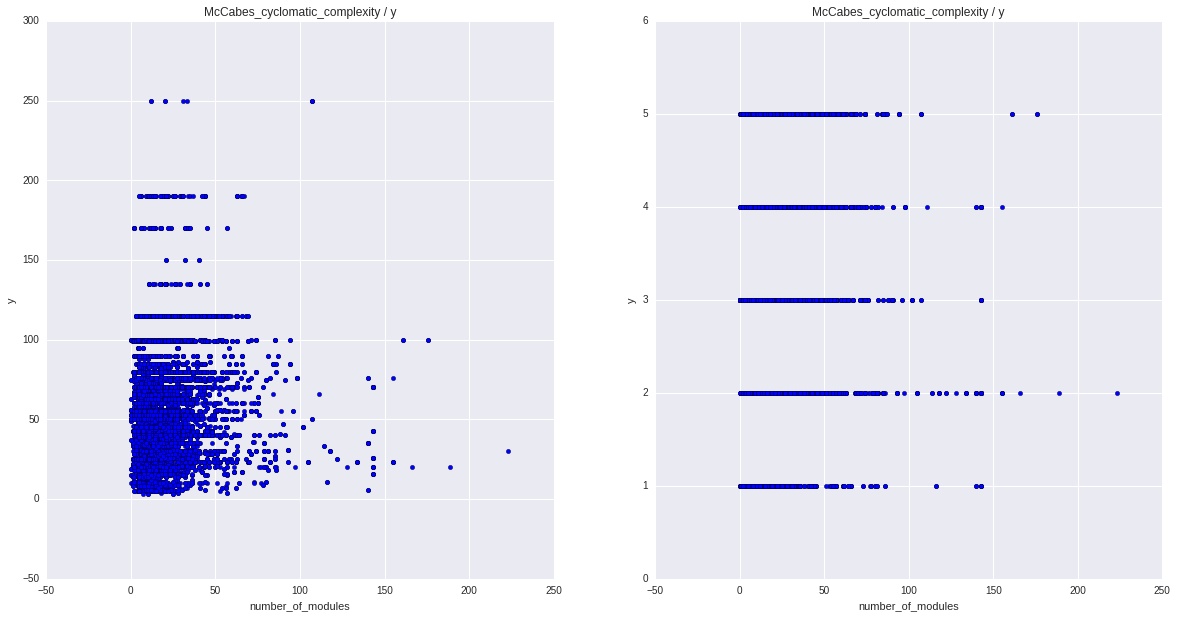

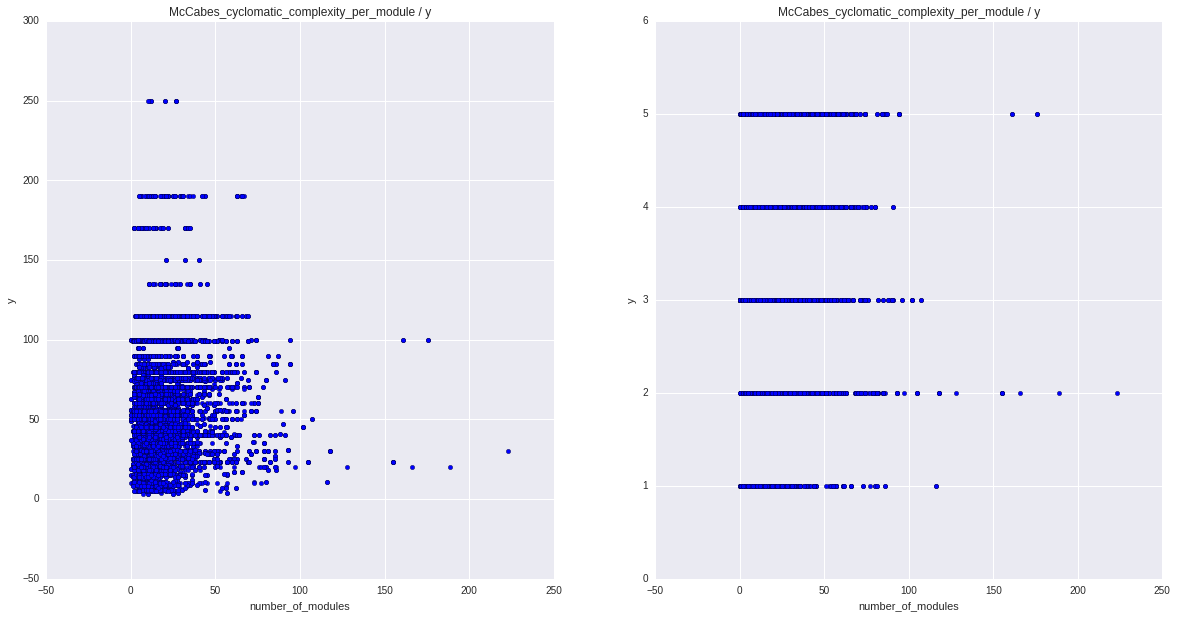

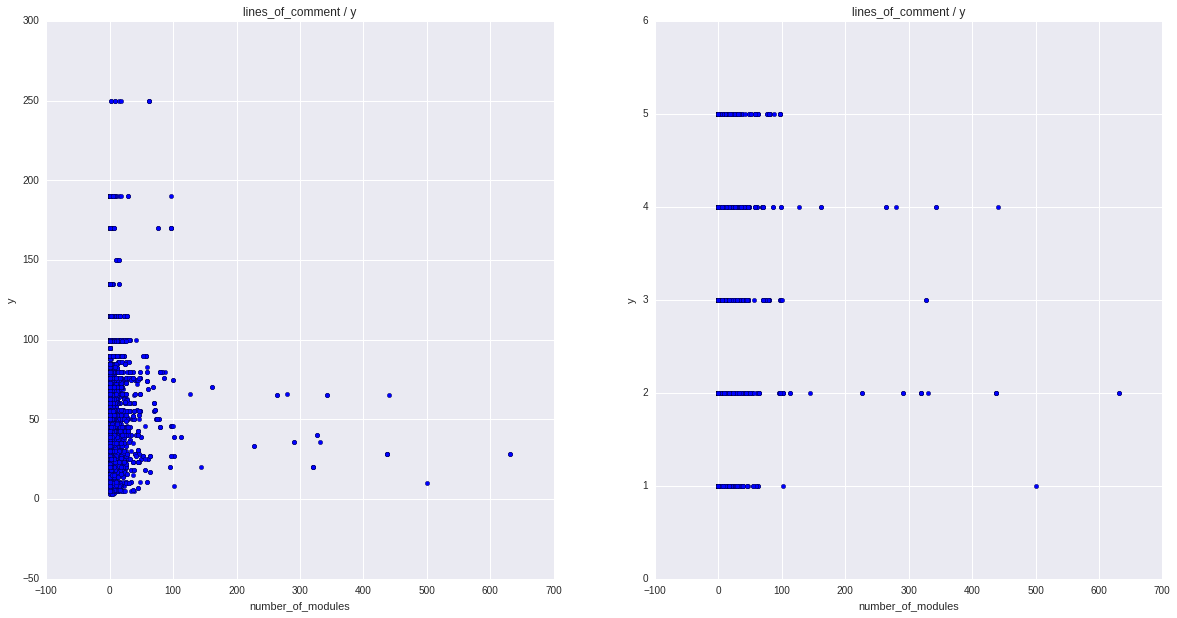

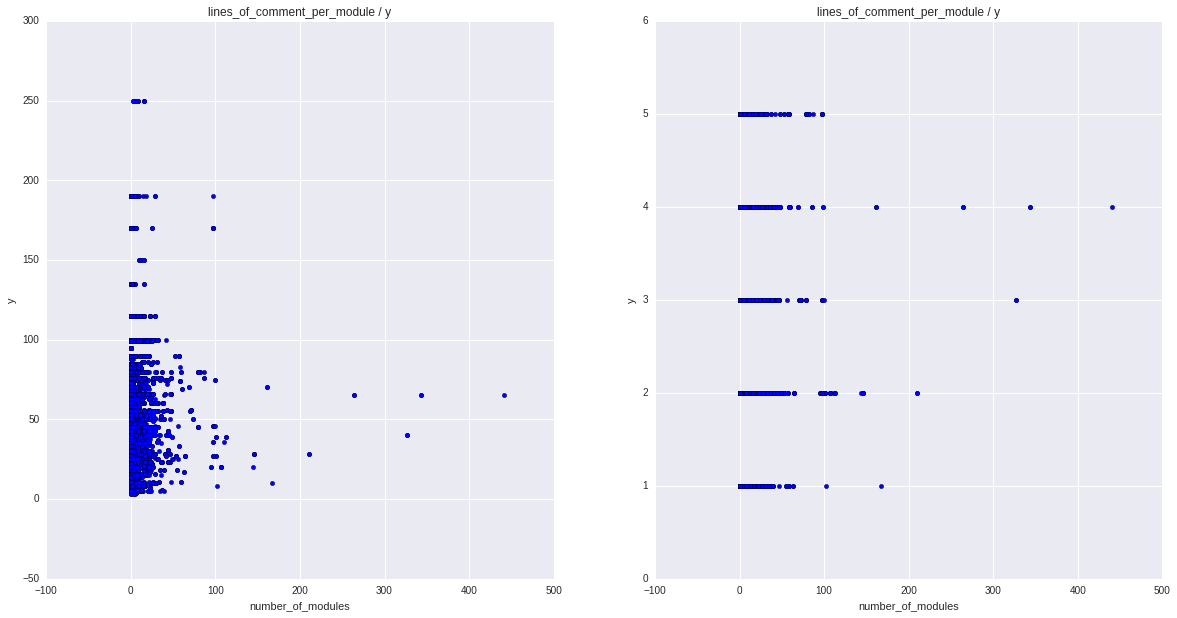

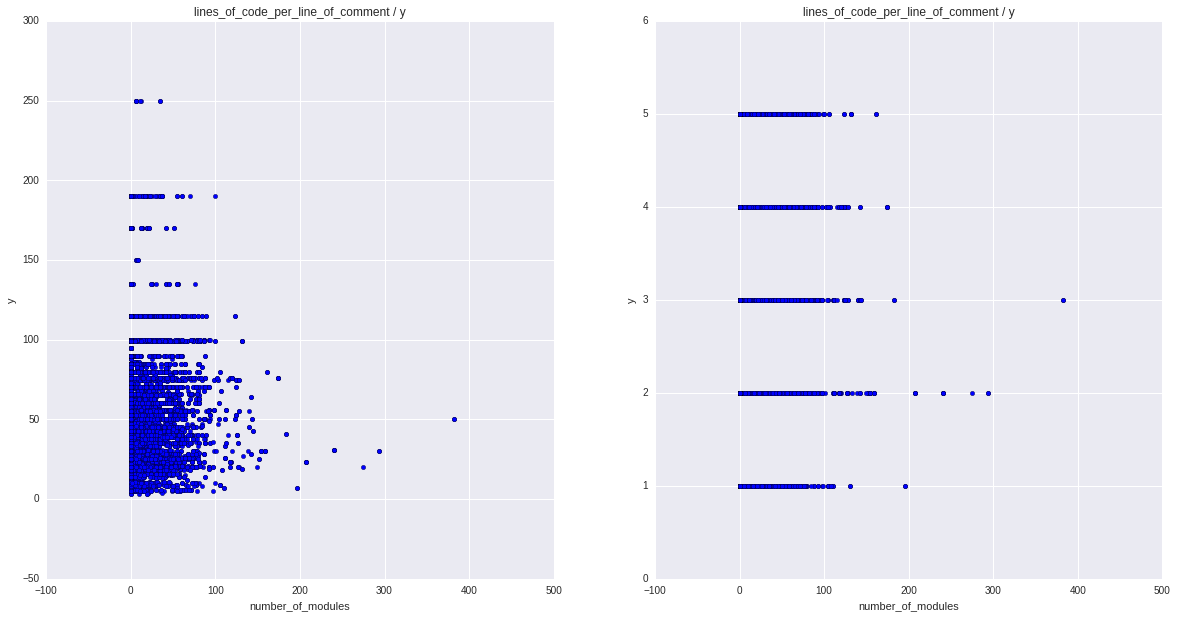

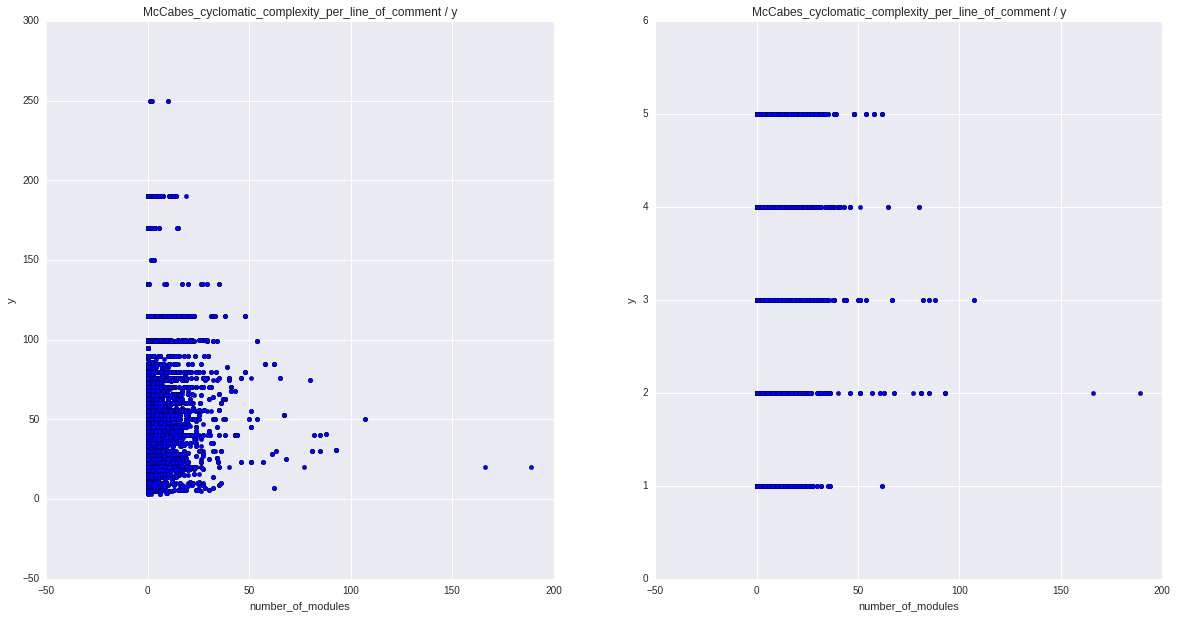

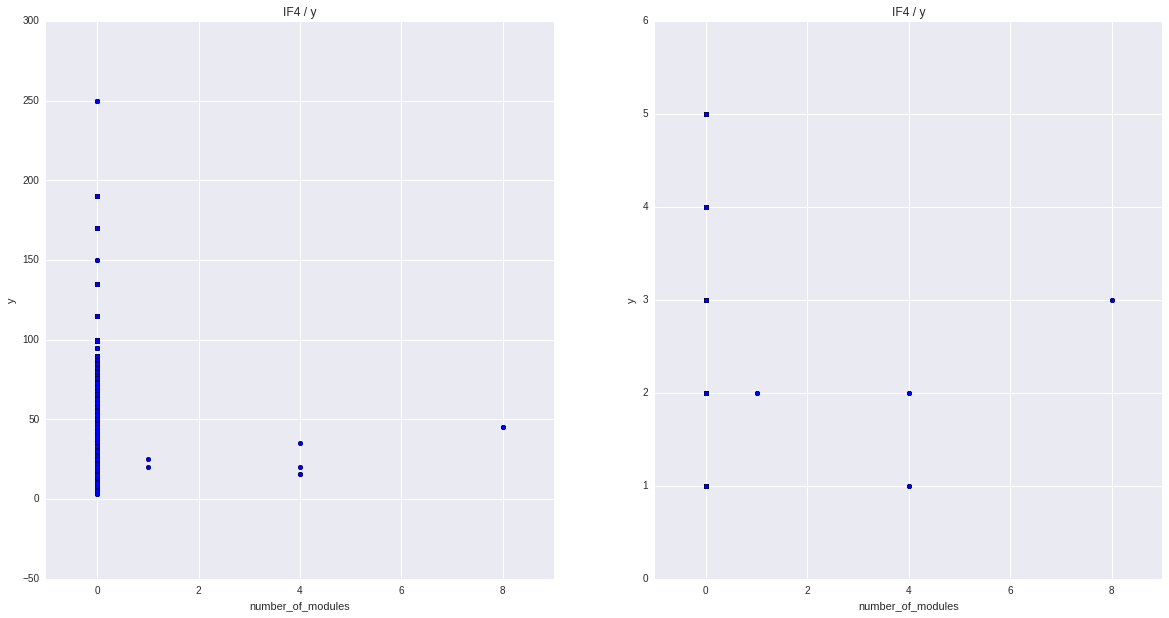

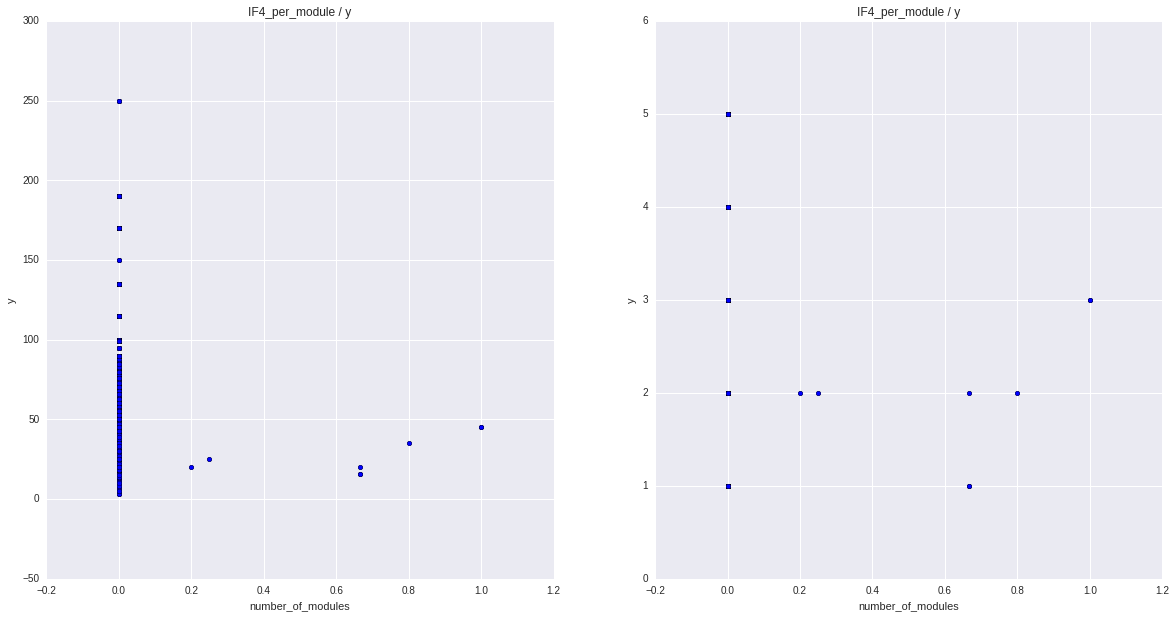

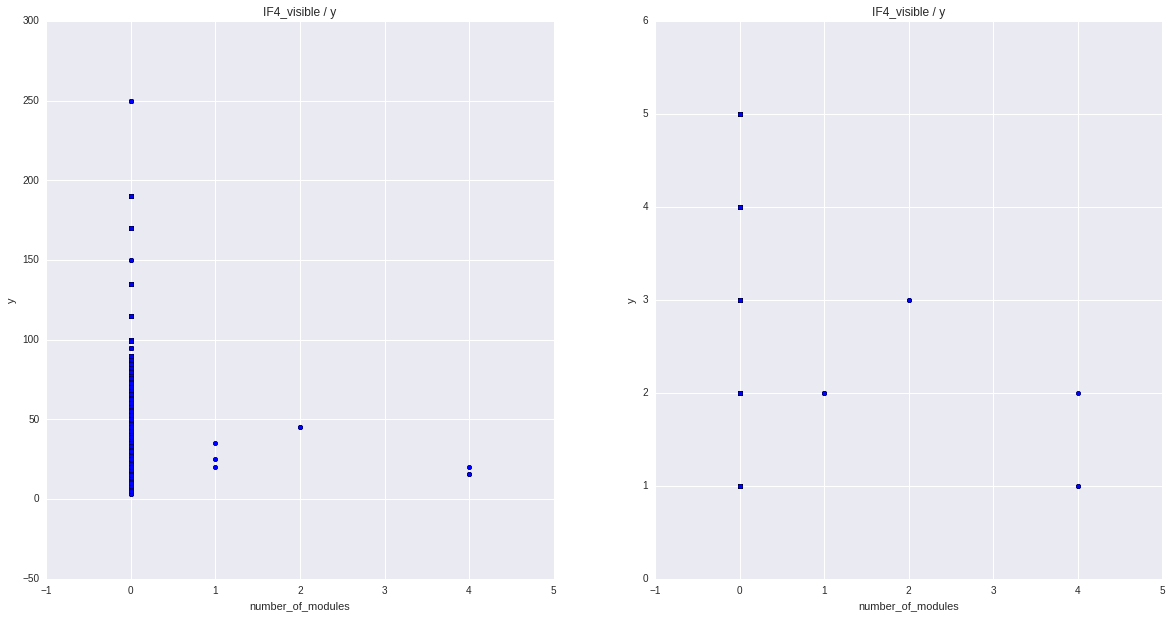

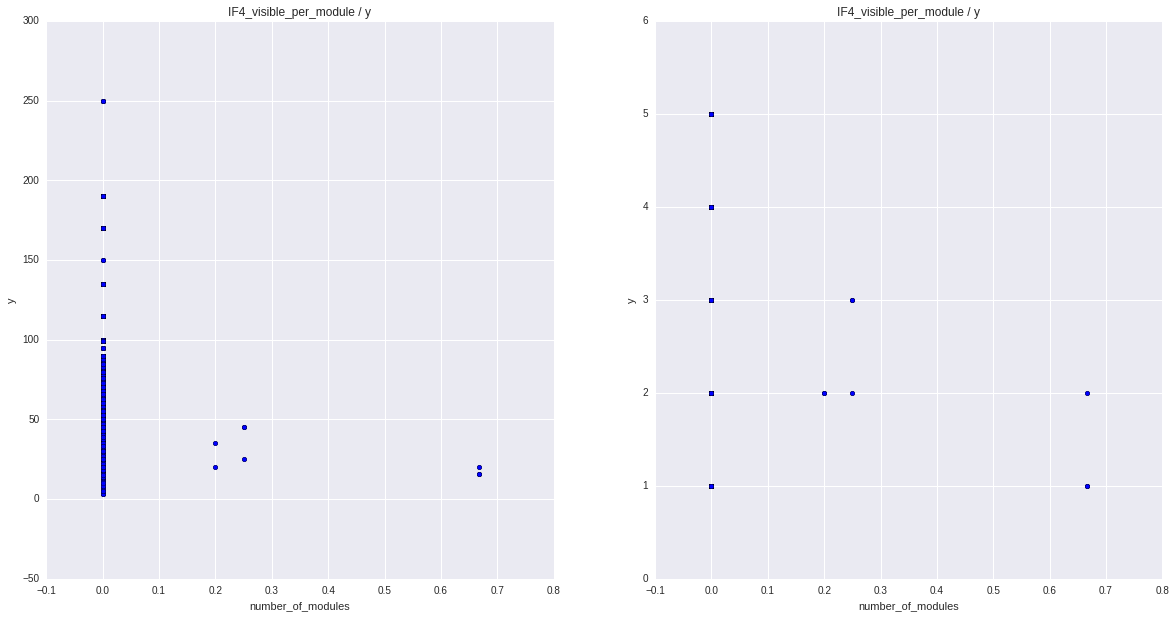

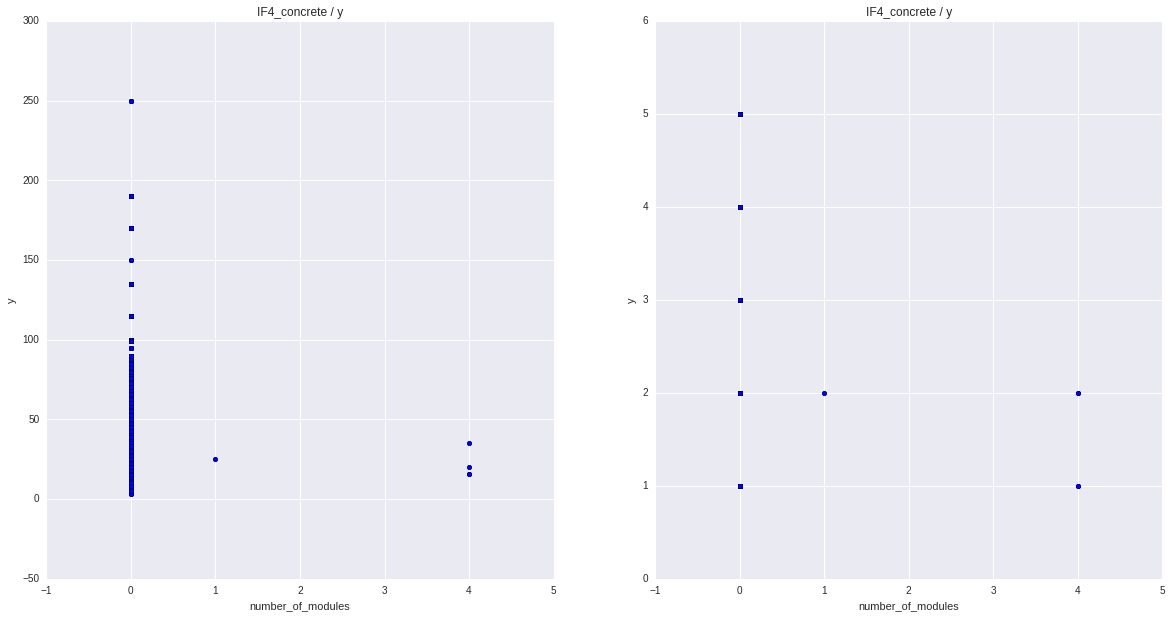

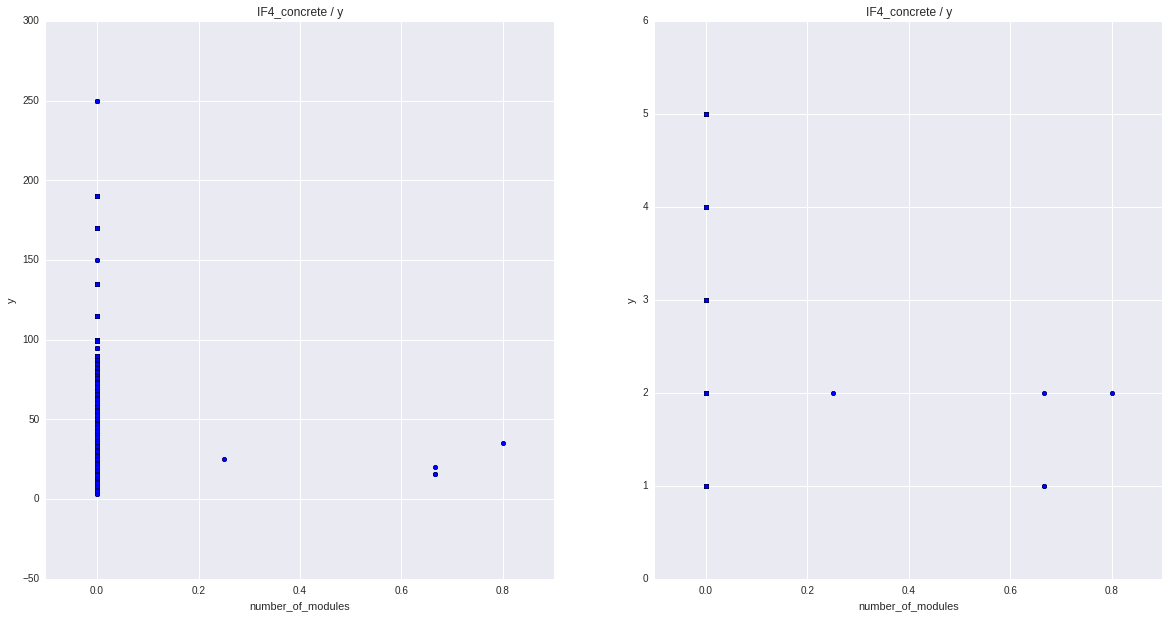

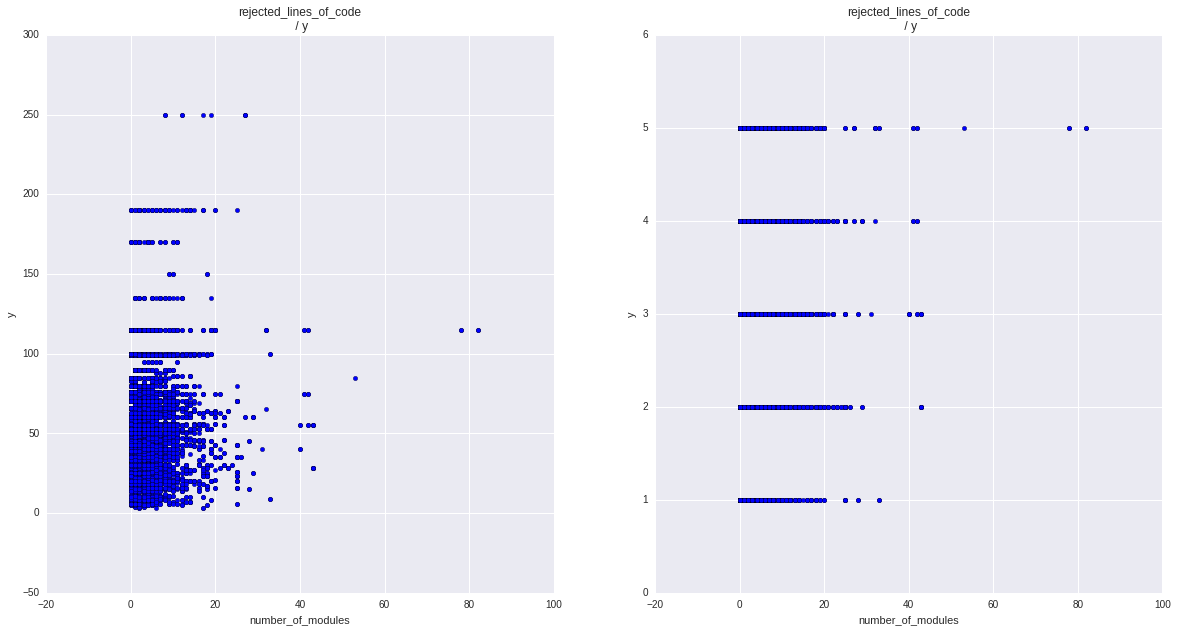

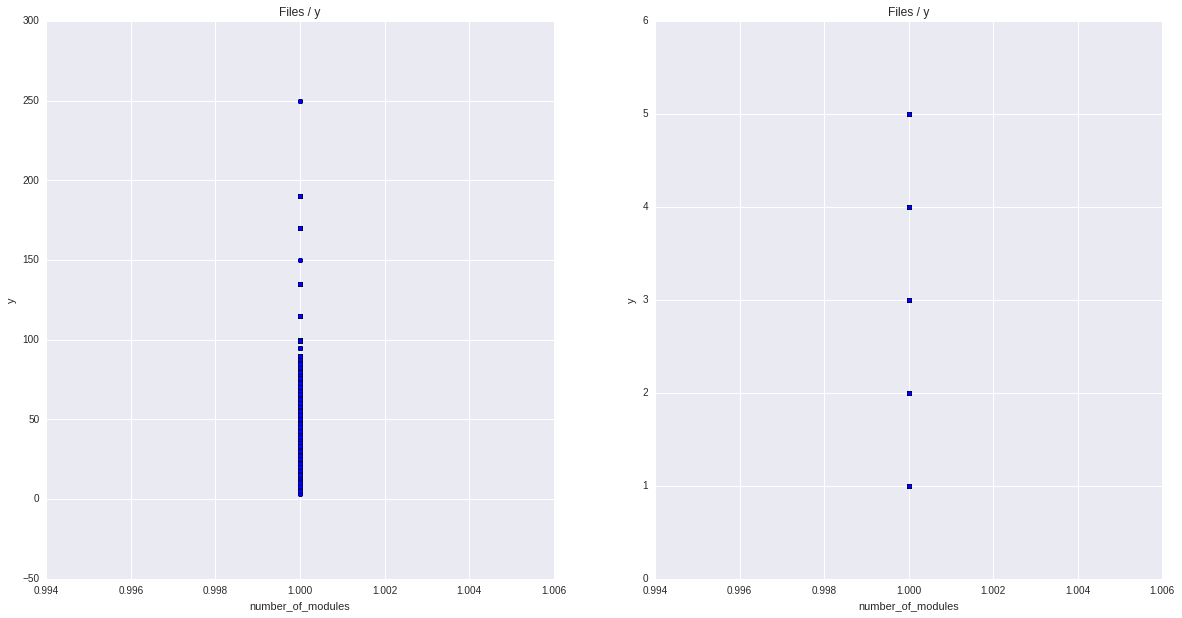

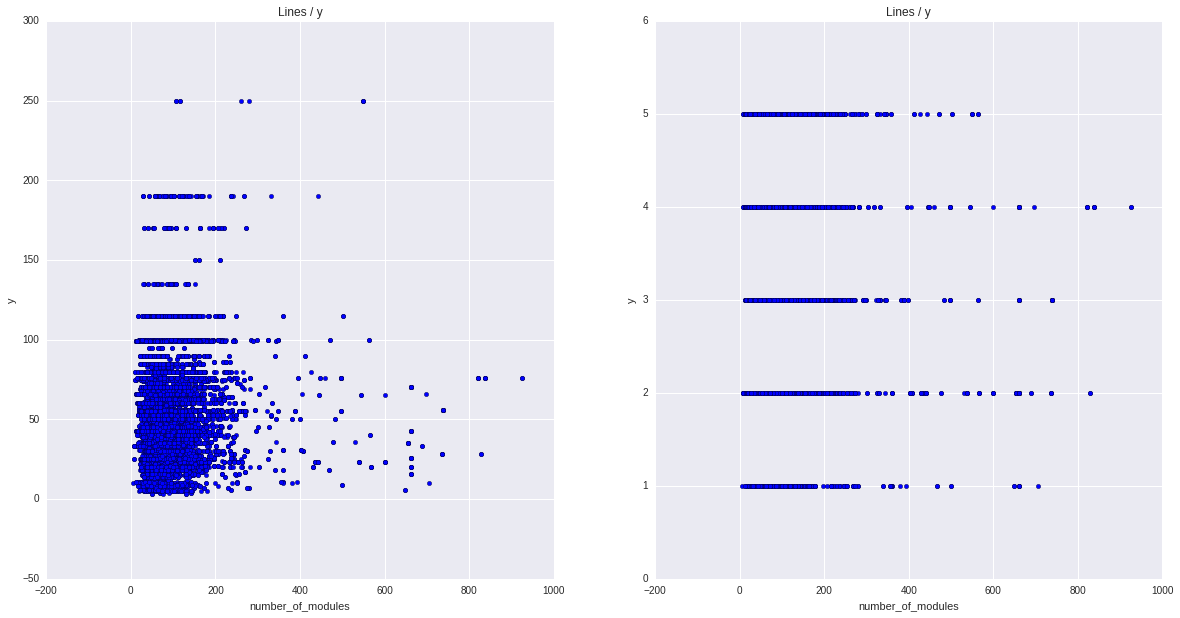

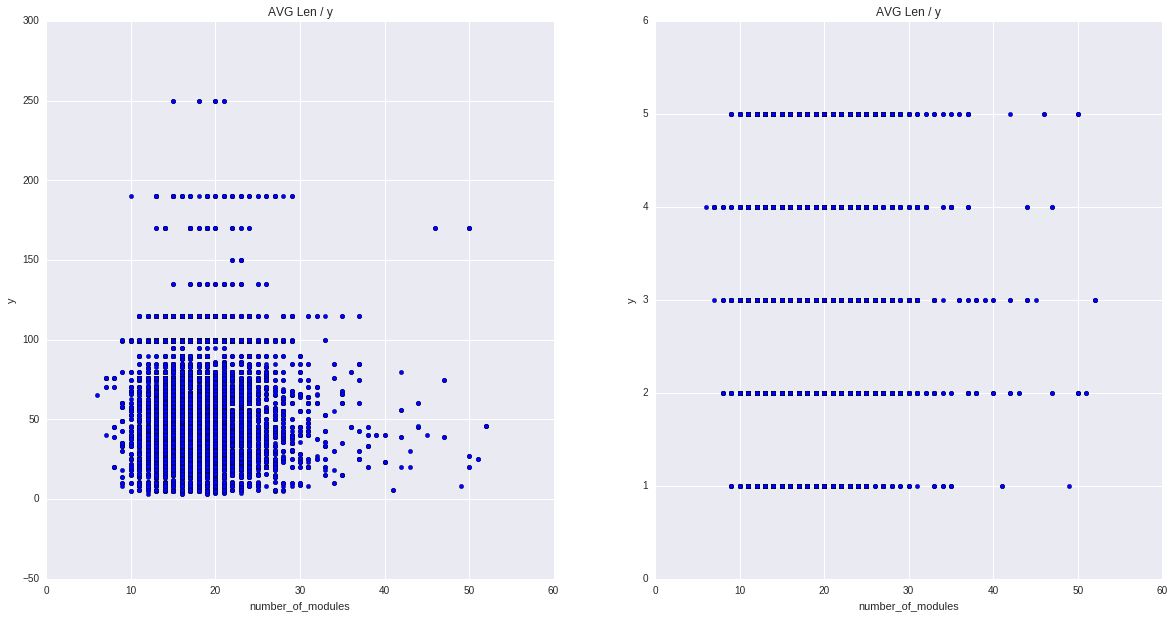

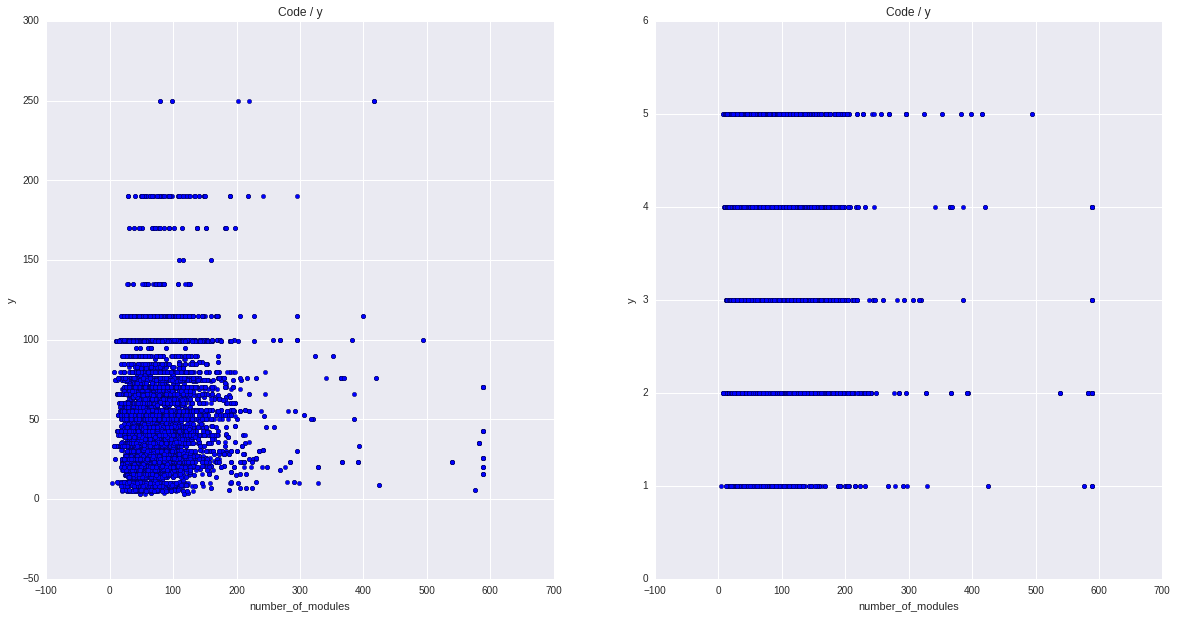

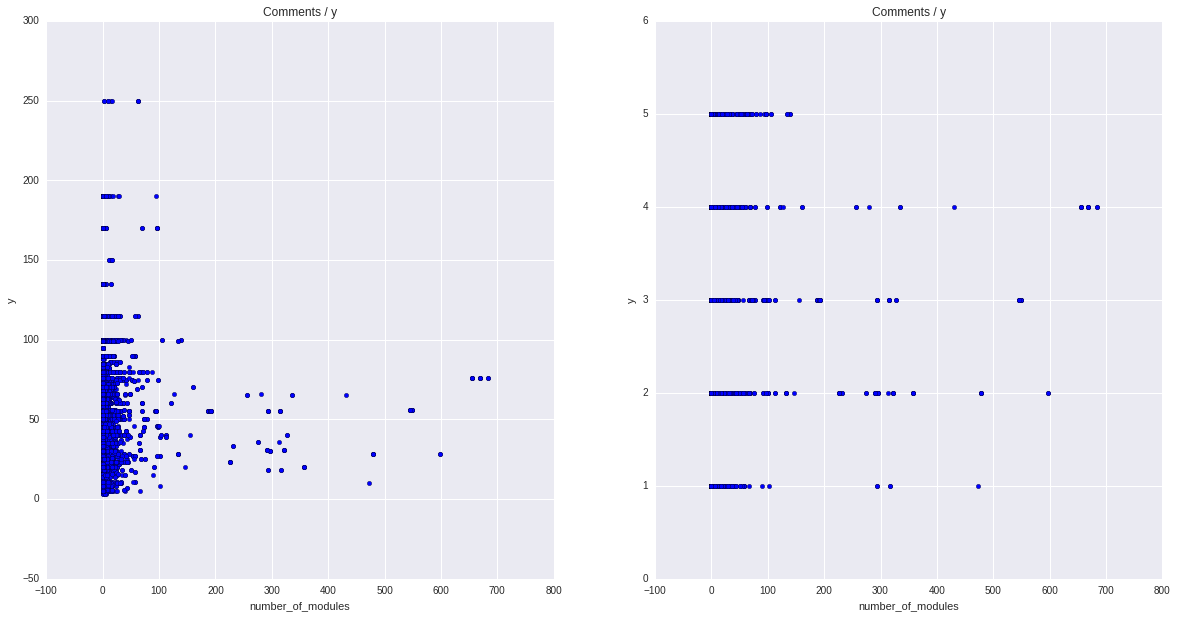

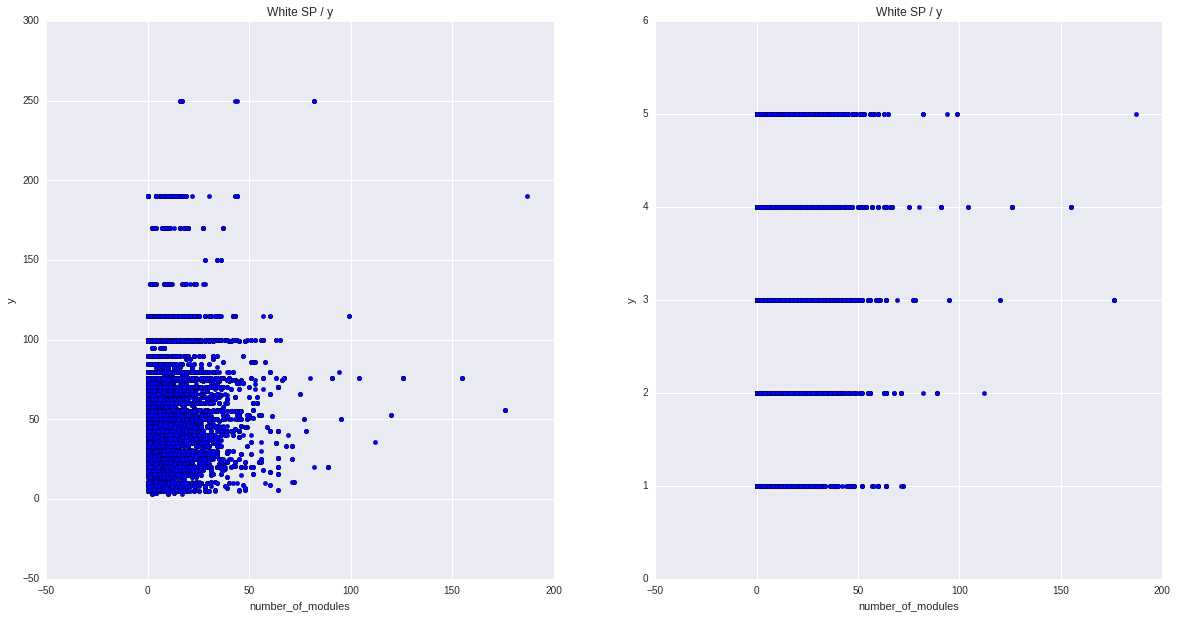

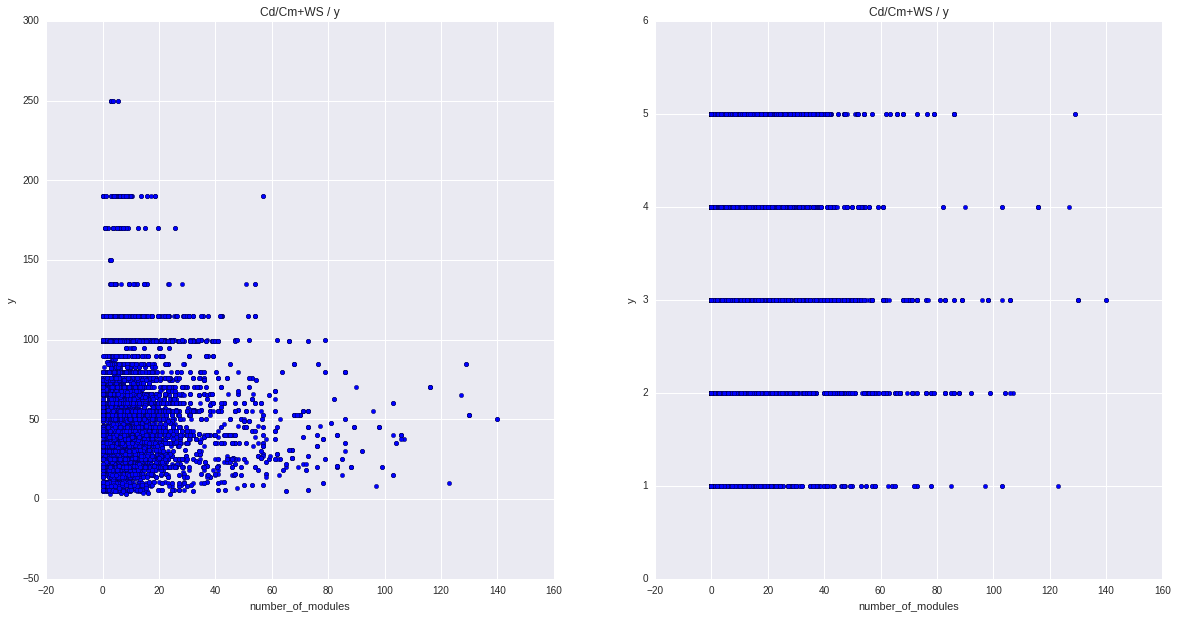

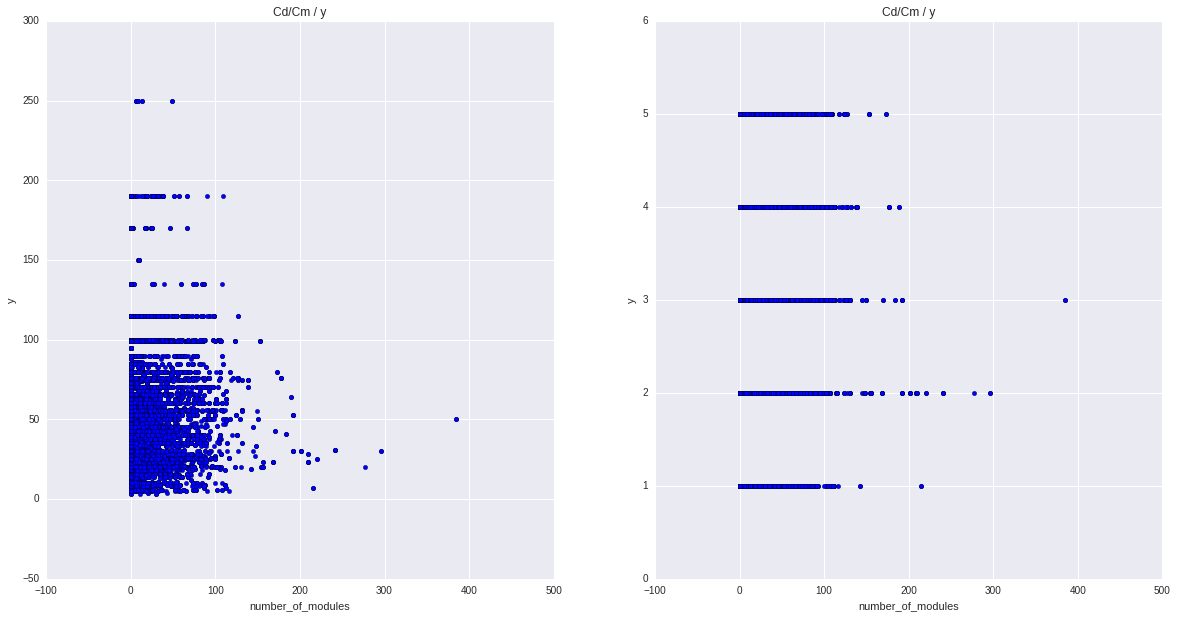

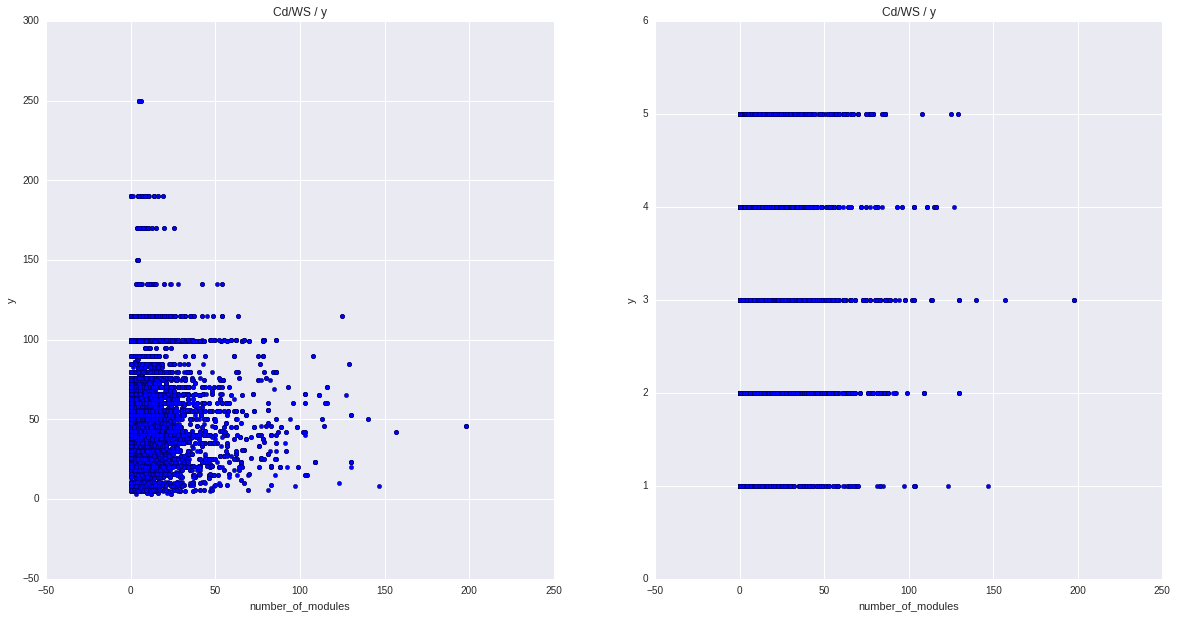

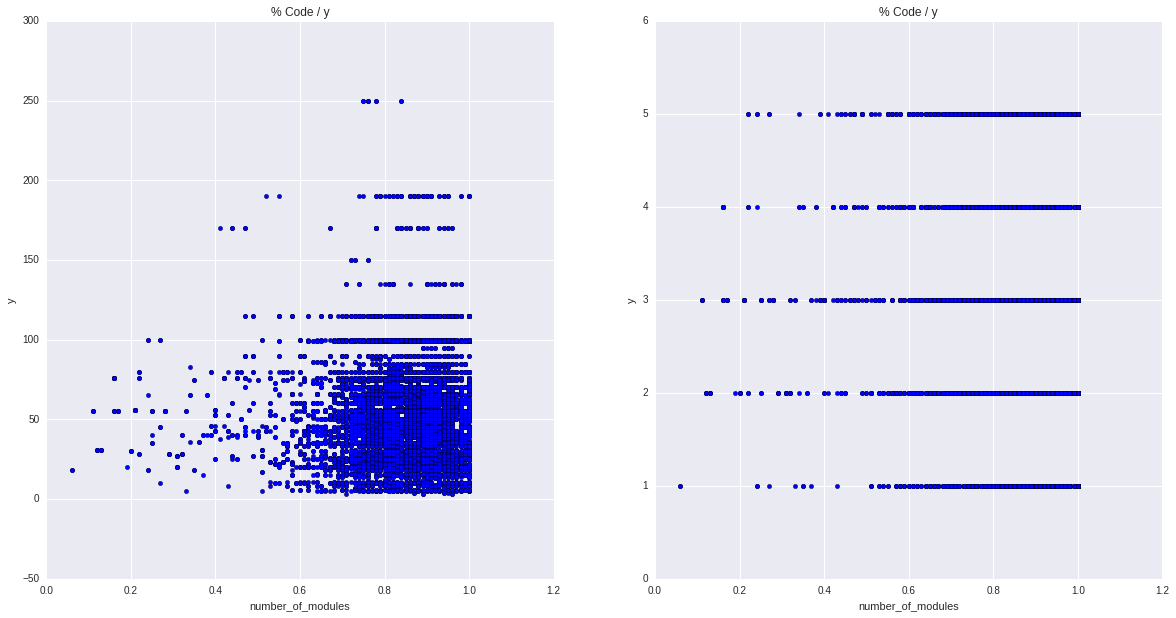

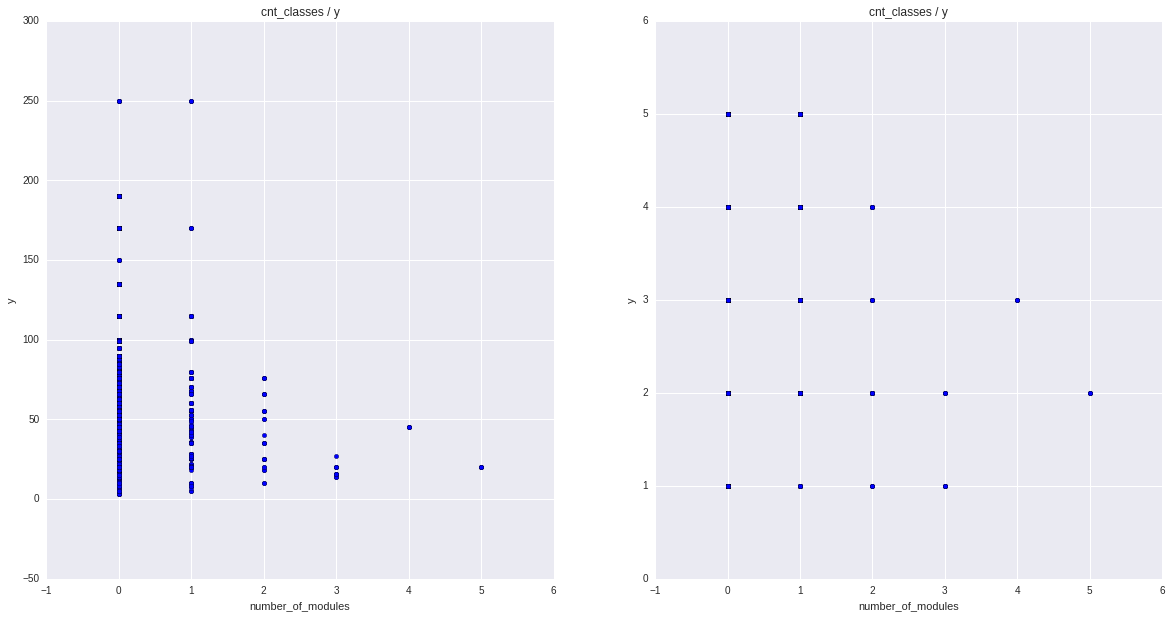

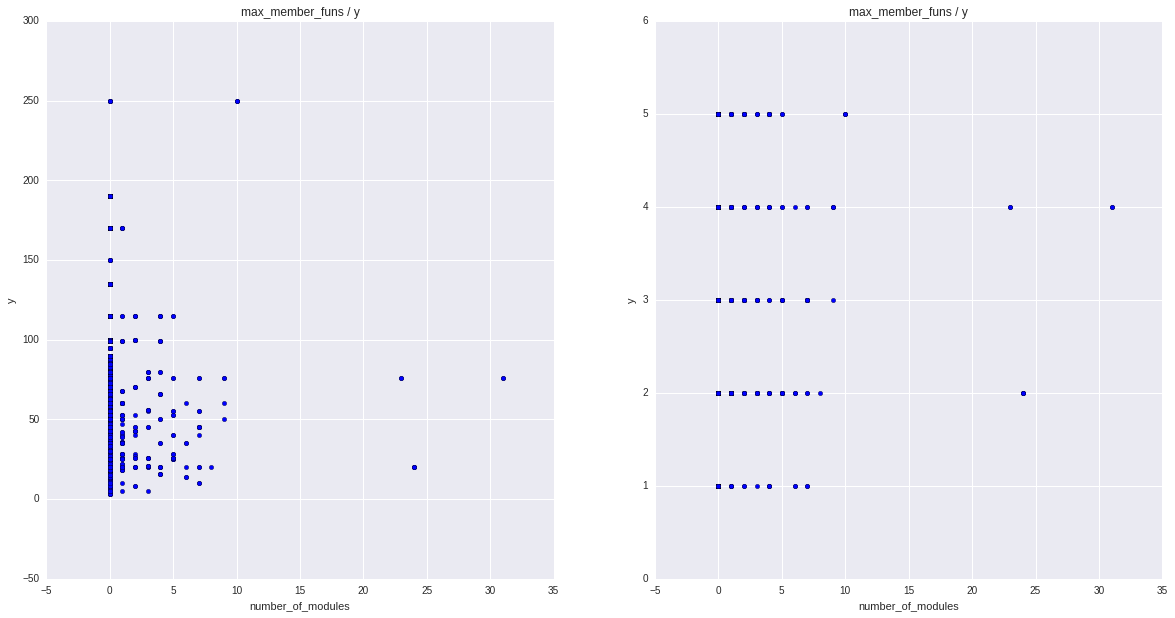

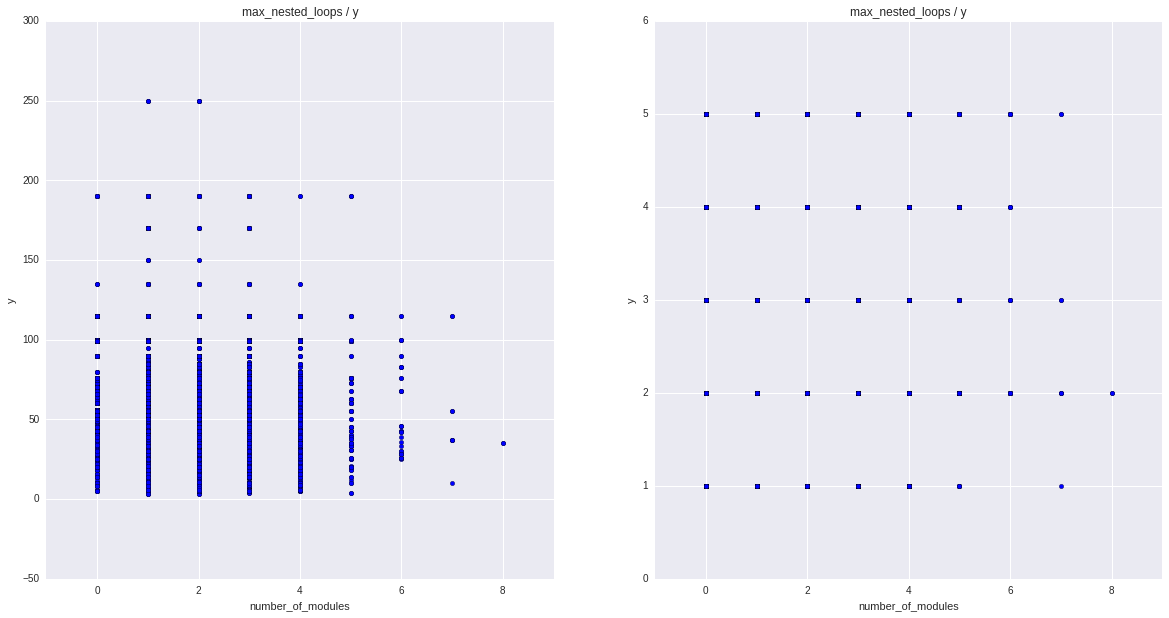

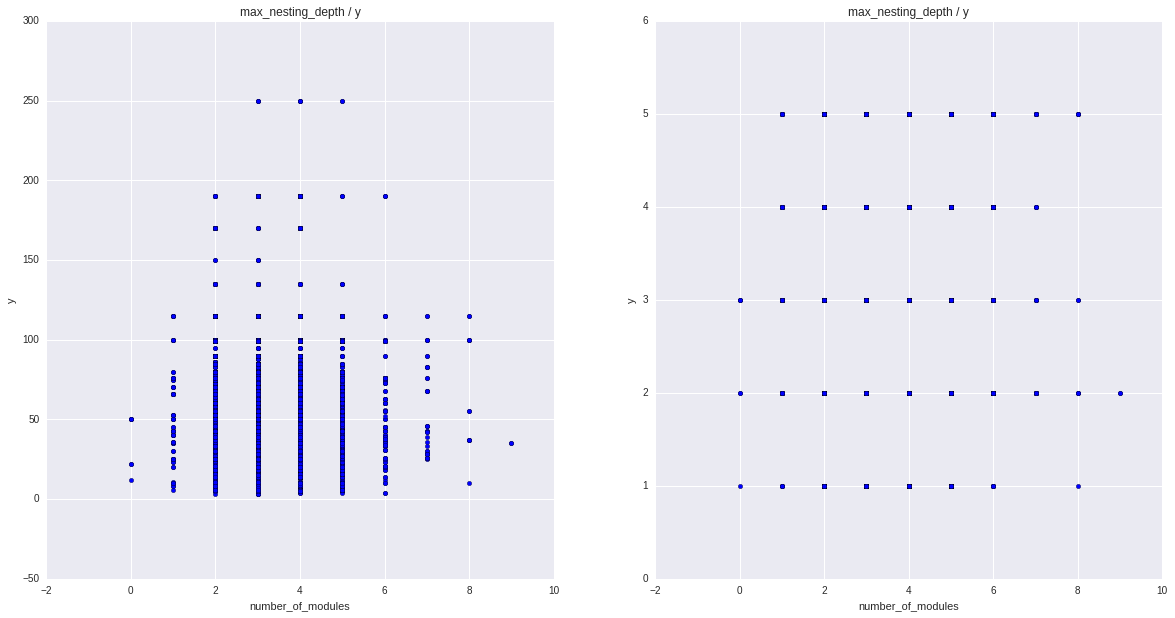

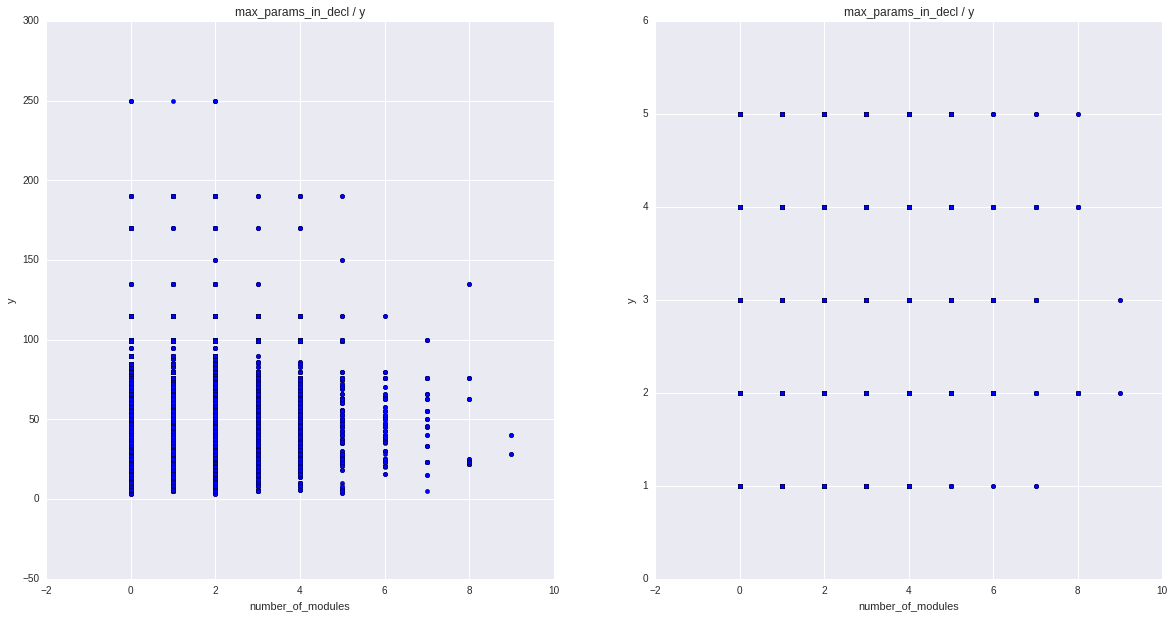

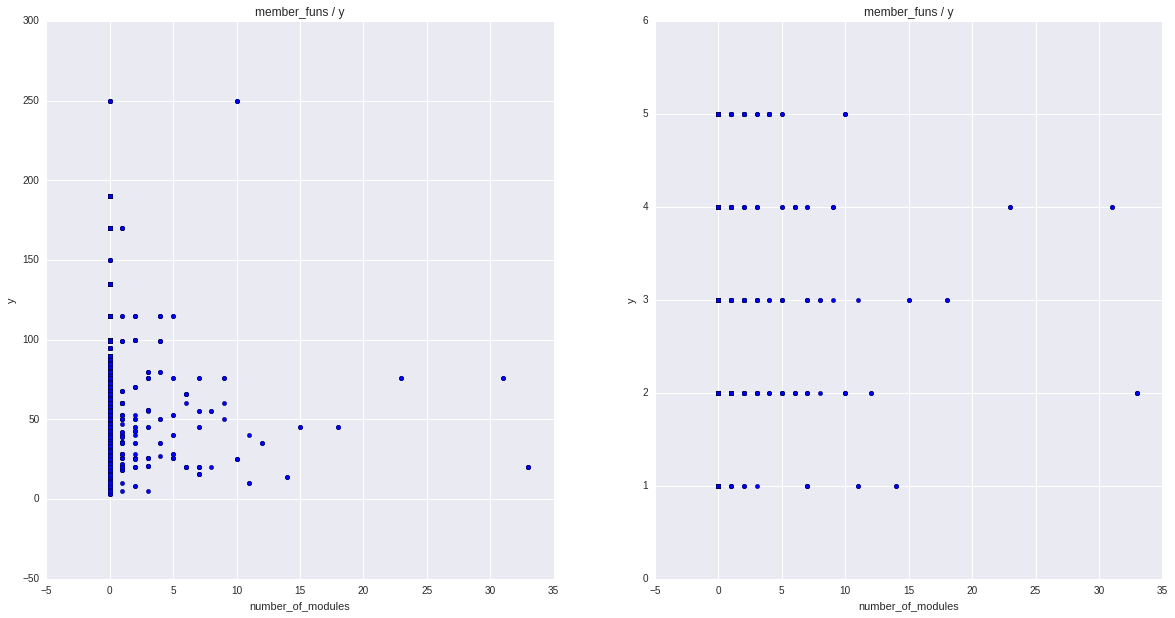

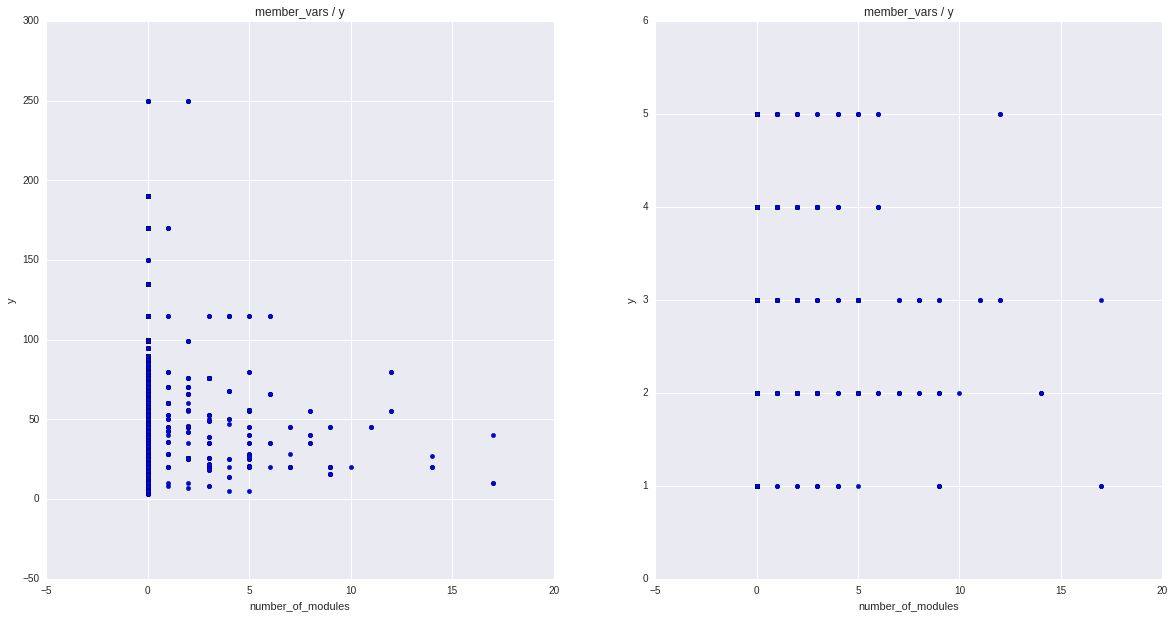

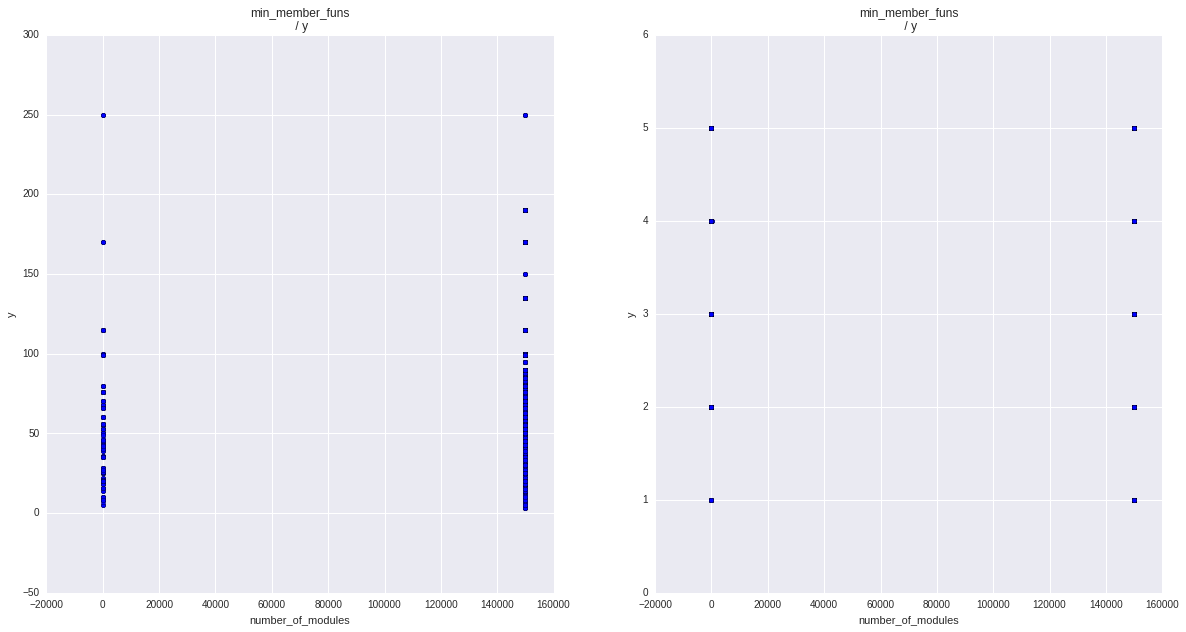

In [33]:
#figure, axarr = plt.subplots(34, 2, figsize=(15, 15))
#figure.tight_layout()

for label_index in range(34):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title(labels[label_index] + ' / y')
    plt.xlabel(labels[i])
    plt.ylabel('y')
    temp1 = list()
    for k in range(0, len(X)):
        temp1.append(X[k][label_index])
    plt.scatter(temp1, y)
    plt.subplot(1, 2, 2)
    temp2 = list()
    plt.title(labels[label_index] + ' / y')
    plt.xlabel(labels[i])
    plt.ylabel('y')
    for k in range(0, len(X)):
        temp2.append(X[k][label_index])
    plt.scatter(temp2, y_labels)
    plt.show()